# Carbon instensity of Sustainable PV for Energy Transition
This analysis explores the carbon implications of different PV sustainability/circular economy designs in the context of achieving energy transition. These calculations build upon previous work that can be found in journals 13 and 17.

Attempt 1

In [1]:
import numpy as np
import pandas as pd
import os,sys
from pathlib import Path
import matplotlib.pyplot as plt

cwd = os.getcwd() #grabs current working directory

testfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP' / 'CarbonAnalysis')
inputfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP')
baselinesfolder = str(Path().resolve().parent.parent /'PV_ICE' / 'baselines')
supportMatfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'baselines' / 'SupportingMaterial')
carbonfolder = str(Path().resolve().parent.parent / 'PV_ICE'/ 'baselines'/ 'CarbonLayer')
altBaselinesfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'baselines' / 'Energy_CellModuleTechCompare')
energyanalysisfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP' / 'EnergyAnalysis')

if not os.path.exists(testfolder):
    os.makedirs(testfolder)

In [2]:
from platform import python_version 
print(python_version())

3.8.8


In [3]:
import PV_ICE
PV_ICE.__version__

'v0.2.0+520.g4b320f8.dirty'

In [4]:
#https://www.learnui.design/tools/data-color-picker.html#palette
#color pallette - modify here for all graphs below
colorpalette=['#000000', #PV ICE baseline
              '#595959', '#7F7F7F', '#A6A6A6', '#D9D9D9', #BAU, 4 grays, perc, shj, topcon, irena
              #'#067872','#0aa39e','#09d0cd','#00ffff', #realistic cases (4) teals, perc, shj, topcon, irena
              '#0579C1','#C00000','#FFC000', #extreme cases (3) long life, high eff, circular
                '#6E30A0','#00B3B5','#10C483', #ambitious modules (5) high eff+ long life, 50 yr perc, recycleSi, 
               '#97CB3F','#FF7E00' #circular perovskite+life, circular perovkiste+ high eff
                ] 

colormats = ['#00bfbf','#ff7f0e','#1f77be','#2ca02c','#d62728','#9467BD','#8C564B', 'black'] #colors for material plots       

import matplotlib as mpl #import matplotlib
from cycler import cycler #import cycler
mpl.rcParams['axes.prop_cycle'] = cycler(color=colorpalette) #reset the default color palette of mpl

plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = (8, 6)

scennames_labels = ['PV_ICE','PERC','SHJ','TOPCon','Low\nQuality',
                         'Long-Lived','High Eff','Circular',
                        'High Eff\n+ Long-life','Long-Life\n+ Recycling',
                         'Recycled-Si\n+ Long-life','Circular\n+ Long-life',
                        'Circular\n+ High Eff'
                    ]  

scennames_labels_flat = ['PV_ICE','PERC','SHJ','TOPCon','Low Quality',
                         'Long-Lived','High Eff','Circular',
                        'High Eff + Long-life','Long-Life + Recycling',
                         'Recycled-Si + Long-life','Circular + Long-life',
                        'Circular + High Eff'
                    ] 

In [5]:
MATERIALS = ['glass', 'silicon', 'silver', 'aluminium_frames', 'copper', 'encapsulant', 'backsheet']
moduleFile_m = os.path.join(baselinesfolder, 'baseline_modules_mass_US.csv')
moduleFile_e = os.path.join(baselinesfolder, 'baseline_modules_energy.csv')

In [6]:
#load in the simulation from Energy Analysis journal
sim1 = PV_ICE.Simulation.load_Simpickle(filename=r'C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\TEMP\EnergyAnalysis\sim1.pkl')

sim1.calculateCarbonFlows()

sim1.scenario['r_PERC'].dataOut_c

In [7]:
sim1.scenario['r_PERC'].dataOut_m

,Area,Cumulative_Active_Area,EOL_BadStatus,EOL_Landfill0,EOL_PATHS,EOL_PG,Effective_Capacity_[W],Landfill_0_ProjLife,MerchantTail_Area,MerchantTail_[W],...,Yearly_Sum_Area_PathsBad,Yearly_Sum_Area_PathsGood,Yearly_Sum_Area_atEOL,Yearly_Sum_Power_EOLby_Degradation,Yearly_Sum_Power_EOLby_Failure,Yearly_Sum_Power_EOLby_ProjectLifetime,Yearly_Sum_Power_PathsBad,Yearly_Sum_Power_PathsGood,Yearly_Sum_Power_atEOL,irradiance_stc
0,5.237421e+06,5.237421e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.520622e+08,0.000000e+00,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1070.0
1,2.381558e+06,7.618978e+06,5.019410e-03,2.844333e-02,5.019410e-03,0.000000e+00,1.092986e+09,0.000000e+00,0.0,0.0,...,3.346274e-02,0.000000e+00,3.346274e-02,0.0,4.769010e+00,0.000000e+00,4.769010e+00,0.000000e+00,4.769010e+00,1070.0
2,2.399211e+06,1.001819e+07,3.883317e-01,2.200546e+00,3.883317e-01,0.000000e+00,1.437059e+09,0.000000e+00,0.0,0.0,...,2.588878e+00,0.000000e+00,2.588878e+00,0.0,3.662374e+02,0.000000e+00,3.662374e+02,0.000000e+00,3.662374e+02,1070.0
3,3.636895e+06,1.365505e+07,4.784439e+00,2.711182e+01,4.784439e+00,0.000000e+00,1.965030e+09,0.000000e+00,0.0,0.0,...,3.189626e+01,0.000000e+00,3.189626e+01,0.0,4.481373e+03,0.000000e+00,4.481373e+03,0.000000e+00,4.481373e+03,1070.0
4,7.372109e+06,2.102697e+07,2.774546e+01,1.572243e+02,2.774546e+01,0.000000e+00,3.051979e+09,0.000000e+00,0.0,0.0,...,1.849697e+02,0.000000e+00,1.849697e+02,0.0,2.582007e+04,0.000000e+00,2.582007e+04,0.000000e+00,2.582007e+04,1070.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,7.591823e+09,3.541404e+11,1.667387e+08,1.552650e+09,4.657949e+09,4.491210e+09,8.508872e+13,1.497070e+09,0.0,0.0,...,2.223183e+08,4.491210e+09,6.210598e+09,0.0,4.896471e+10,1.297565e+12,4.896471e+10,9.731736e+11,1.346529e+12,1070.0
97,8.003568e+09,3.554404e+11,1.278019e+08,1.675878e+09,5.027633e+09,4.899831e+09,8.530804e+13,1.633277e+09,0.0,0.0,...,1.704025e+08,4.899831e+09,6.703511e+09,0.0,3.775151e+10,1.415620e+12,3.775151e+10,1.061715e+12,1.453372e+12,1070.0
98,4.560406e+09,3.574687e+11,1.455385e+08,6.330470e+08,1.899141e+09,1.753602e+09,8.552736e+13,5.845342e+08,0.0,0.0,...,1.940513e+08,1.753602e+09,2.532188e+09,0.0,4.301322e+10,5.066369e+11,4.301322e+10,3.799777e+11,5.496501e+11,1070.0
99,4.619609e+09,3.594903e+11,1.708910e+08,6.494993e+08,1.948498e+09,1.777607e+09,8.574668e+13,5.925356e+08,0.0,0.0,...,2.278547e+08,1.777607e+09,2.597997e+09,0.0,5.050157e+10,5.135720e+11,5.050157e+10,3.851790e+11,5.640736e+11,1070.0


## Project grid forward to 100% re in 2050
To parallel the PV deployment, we will assume that we globally hit 100% RE in 2050 with the 75 TW of PV. As such, we need to change the future projection of marketshares of the different country grids.

One scenario with decarb grid, one scenario with decarb grid and heat

Estimating that 60-70% generation will be from Solar, 30-40% from wind, and any remainder from "other renewables"

In [8]:
countrygridmix = pd.read_csv(os.path.join(carbonfolder,'baseline_countrygridmix.csv'), index_col='year')
gridsources = ['Bioenergy','Hydro','Nuclear','OtherFossil','OtherRenewables','Solar','Wind']
nonRE = ['Coal','Gas','OtherFossil','Nuclear','Bioenergy']

In [9]:
countrygridmix.loc[2023:,:]=np.nan #delete 2023 to 2050
nonRE_search = '|'.join(nonRE) #create nonRE search
countrygridmix.loc[2050, countrygridmix.columns.str.contains(nonRE_search)] = 0.0 #set all nonRE to 0 in 2050

In [10]:
countrygridmix.loc[2050, countrygridmix.columns.str.contains('Solar')] = 63.0
countrygridmix.loc[2050, countrygridmix.columns.str.contains('Wind')] = 33.0
countrygridmix.loc[2050, countrygridmix.columns.str.contains('Hydro')] = 3.0
countrygridmix.loc[2050, countrygridmix.columns.str.contains('OtherRenewables')] = 1.0
#numbers derived from leading scenario electricity generation Breyer et al 2022 scenarios (EU focused)

In [11]:
countrygridmix_100RE2050 = countrygridmix.interpolate() #linearly interpolate between 2022 and 2050

In [12]:
apnd_idx = pd.RangeIndex(start=2051,stop=2101,step=1) #create temp df
apnd_df = pd.DataFrame(columns=countrygridmix_100RE2050.columns, index=apnd_idx )
countrygridmix_100RE20502100 = pd.concat([countrygridmix_100RE2050.loc[2000:],apnd_df], axis=0) #extend through 2100
countrygridmix_100RE20502100.ffill(inplace=True) #propogate 2050 values through 2100

In [13]:
countrygridmix_100RE20502100.loc[2050]

China_Bioenergy            0.0
China_Coal                 0.0
China_Gas                  0.0
China_Hydro                3.0
China_Nuclear              0.0
                          ... 
Zambia_Nuclear             0.0
Zambia_OtherFossil         0.0
Zambia_OtherRenewables     1.0
Zambia_Solar              63.0
Zambia_Wind               33.0
Name: 2050, Length: 472, dtype: float64

This is a simple projection, assumes all countries have same ratio of PV and wind (which we know can't be true). Update in future with country specific projections.

In [14]:
pd.read_csv(os.path.join(carbonfolder,'baseline_electricityemissionfactors.csv'), index_col=[0])

,CO2eq_gpWh_IPCC2006,CO2eq_gpWh_ember,CO2_gpWh_EIA,CO2_gpWh_EPA
Energy Source,,,,
Bioenergy,0.3005,0.230,0.0000,0.3170
Coal,0.3487,0.820,0.3215,0.3380
Gas,0.2291,0.490,0.1805,0.1810
Hydro,0.0000,0.024,0.0000,0.0000
Nuclear,0.0000,0.012,0.0000,0.0000
OtherFossil,0.2671,0.700,0.2413,0.0000
OtherRenewables,0.0000,0.038,0.0000,0.0000
Solar,0.0000,0.048,0.0000,0.0000
Wind,0.0000,0.011,0.0000,0.0000


In [15]:
sim1.calculateCarbonFlows(countrygridmixes=countrygridmix_100RE20502100)



>>>> Calculating Carbon Flows <<<<

Working on Scenario:  PV_ICE
********************
Working on Carbon for Module
==> Working on Carbon for Material :  glass
==> Working on Carbon for Material :  silicon
==> Working on Carbon for Material :  silver
==> Working on Carbon for Material :  aluminium_frames
==> Working on Carbon for Material :  copper
==> Working on Carbon for Material :  encapsulant
==> Working on Carbon for Material :  backsheet
Working on Scenario:  r_PERC
********************
Working on Carbon for Module
==> Working on Carbon for Material :  glass
==> Working on Carbon for Material :  silicon
==> Working on Carbon for Material :  silver
==> Working on Carbon for Material :  aluminium_frames
==> Working on Carbon for Material :  copper
==> Working on Carbon for Material :  encapsulant
==> Working on Carbon for Material :  backsheet
Working on Scenario:  r_SHJ
********************
Working on Carbon for Module
==> Working on Carbon for Material :  glass
==> Working on C

# Carbon Analysis
this will become the aggregate carbon results function

In [16]:
scenarios = sim1.scenario

In [17]:
sim_carbon_results = pd.DataFrame()
sim_annual_carbon = pd.DataFrame()
for scen in scenarios:
    print(scen)
    mod_carbon_scen_results = sim1.scenario[scen].dataOut_c.add_prefix(str(scen+'_'))
    
    #mod annual carbon calcs here (selecting to avoid double counting)
    mod_mfg_carbon_total = mod_carbon_scen_results.filter(like='Global_gCO2eqpwh_mod_MFG_gCO2eq') #annual mfging carbon

    mod_nonvMFG = ['Install','OandM','Repair','Demount','Store','Resell','ReMFG','Recycle'] #could remove from loop
    nonvMFG_search = '|'.join(mod_nonvMFG) #create nonRE search
    mod_carbon_sum_nonvmfg = mod_carbon_scen_results.loc[:,mod_carbon_scen_results.columns.str.contains(nonvMFG_search)] #annual non mfging carbon
    scen_annual_carbon_mod = pd.concat([mod_mfg_carbon_total,mod_carbon_sum_nonvmfg], axis=1)
    scen_annual_carbon_mod[scen+'_Annual_Emit_mod_gCO2eq'] = scen_annual_carbon_mod.sum(axis=1)

    scenmatdc = pd.DataFrame()
    for mat in MATERIALS:
        print(mat)
        mat_carbon_scen_results = sim1.scenario[scen].material[mat].matdataOut_c.add_prefix(str(scen+'_'+mat+'_')) 
        
        #calculation for annual carbon emissions total (selecting to avoid double countings)
        mat_vmfg_total = mat_carbon_scen_results.filter(like='vMFG_total')
        mat_ce_recycle = mat_carbon_scen_results.filter(like='Recycle_e_p')
        mat_ce_remfg = mat_carbon_scen_results.filter(like='ReMFG_clean')
        mat_landfill = mat_carbon_scen_results.filter(like='landfill_total')
        mat_scen_annual_carbon = pd.concat([mat_vmfg_total,mat_ce_recycle,mat_ce_remfg,mat_landfill], axis=1)
        mat_scen_annual_carbon[scen+'_Annual_Emit_'+mat+'_gCO2eq'] = mat_scen_annual_carbon.sum(axis=1)
        
        scenmatdc = pd.concat([scenmatdc,mat_carbon_scen_results,
                               mat_scen_annual_carbon[scen+'_Annual_Emit_'+mat+'_gCO2eq']], axis=1) #group all material dc
    
    scen_carbon_results = pd.concat([mod_carbon_scen_results,scenmatdc], axis=1) #append mats to mod
    sim_carbon_results = pd.concat([sim_carbon_results, scen_carbon_results], axis=1) #append all scens "raw" data
    
    #calculate annual carbon emits with grouping by mod and mat
    scen_mats_annual_carbon = scenmatdc.filter(like='Annual_Emit')
    scen_mod_annual_carbon = scen_annual_carbon_mod.filter(like='Annual_Emit_mod')
    scen_annual_carbon = pd.concat([scen_mod_annual_carbon,scen_mats_annual_carbon], axis=1)
    scen_annual_carbon[scen+'_Annual_Emit_total_modmats_gCO2eq'] = scen_annual_carbon.sum(axis=1)
    sim_annual_carbon = pd.concat([sim_annual_carbon,scen_annual_carbon], axis=1)
    
    #FIX INDEX of dfs
sim_annual_carbon.index = pd.RangeIndex(start=2000,stop=2101,step=1)
sim_carbon_results.index = pd.RangeIndex(start=2000,stop=2101,step=1)
    
#return sim_carbon_results, sim_annual_carbon

PV_ICE
glass
silicon
silver
aluminium_frames
copper
encapsulant
backsheet
r_PERC
glass
silicon
silver
aluminium_frames
copper
encapsulant
backsheet
r_SHJ
glass
silicon
silver
aluminium_frames
copper
encapsulant
backsheet
r_TOPCon
glass
silicon
silver
aluminium_frames
copper
encapsulant
backsheet
r_IRENA
glass
silicon
silver
aluminium_frames
copper
encapsulant
backsheet
ex_Life
glass
silicon
silver
aluminium_frames
copper
encapsulant
backsheet
ex_High_eff
glass
silicon
silver
aluminium_frames
copper
encapsulant
backsheet
ex_Circular
glass
silicon
silver
aluminium_frames
copper
encapsulant
backsheet
h_EffLife
glass
silicon
silver
aluminium_frames
copper
encapsulant
backsheet
h_50PERC
glass
silicon
silver
aluminium_frames
copper
encapsulant
backsheet
h_RecycledPERC
glass
silicon
silver
aluminium_frames
copper
encapsulant
backsheet
h_Perovskite_life
glass
silicon
silver
aluminium_frames
copper
encapsulant
backsheet
h_Perovskite_Eff
glass
silicon
silver
aluminium_frames
copper
encapsulant
b

In [18]:
sim_carbon_results

,PV_ICE_China_mod_MFG_gCO2eq,PV_ICE_India_mod_MFG_gCO2eq,PV_ICE_Taiwan_mod_MFG_gCO2eq,PV_ICE_Germany_mod_MFG_gCO2eq,PV_ICE_Japan_mod_MFG_gCO2eq,PV_ICE_SKorea_mod_MFG_gCO2eq,PV_ICE_Canada_mod_MFG_gCO2eq,PV_ICE_Mexico_mod_MFG_gCO2eq,PV_ICE_USA_mod_MFG_gCO2eq,PV_ICE_VietNam_mod_MFG_gCO2eq,...,h_Perovskite_Eff_backsheet_mat_LQeol_p_gCO2eq,h_Perovskite_Eff_backsheet_mat_LQ_p_gCO2eq,h_Perovskite_Eff_backsheet_mat_HQmfg_p_gCO2eq,h_Perovskite_Eff_backsheet_mat_HQeol_p_gCO2eq,h_Perovskite_Eff_backsheet_mat_HQ_p_gCO2eq,h_Perovskite_Eff_backsheet_mat_vMFG_energy_gCO2eq,h_Perovskite_Eff_backsheet_mat_vMFG_total_gCO2eq,h_Perovskite_Eff_backsheet_mat_Recycle_e_p_gCO2eq,h_Perovskite_Eff_backsheet_mat_landfill_total_gCO2eq,h_Perovskite_Eff_Annual_Emit_backsheet_gCO2eq
2000,6.287490e+09,3.726969e+09,6.318297e+08,1.794525e+09,0.0,0.0,5.414536e+08,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.919551e+09,1.445189e+10,0.0,2.391377e+06,1.445429e+10
2001,2.191320e+09,1.349368e+09,2.332168e+08,6.378740e+08,0.0,0.0,2.025203e+08,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.426169e+09,5.271991e+09,0.0,8.790758e+05,5.272870e+09
2002,2.698970e+09,1.657363e+09,2.845645e+08,7.803337e+08,0.0,0.0,2.361252e+08,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.772188e+09,6.533002e+09,0.0,1.081372e+06,6.534083e+09
2003,4.231349e+09,2.545516e+09,4.447166e+08,1.210860e+09,0.0,0.0,3.712389e+08,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.775669e+09,1.019997e+10,0.0,1.727943e+06,1.020169e+10
2004,8.532618e+09,4.972363e+09,9.090725e+08,2.421317e+09,0.0,0.0,7.039480e+08,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.751251e+09,2.120316e+10,0.0,3.626892e+06,2.120679e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
2097,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
2098,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
2099,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00


# Cabon Emissions by material or module

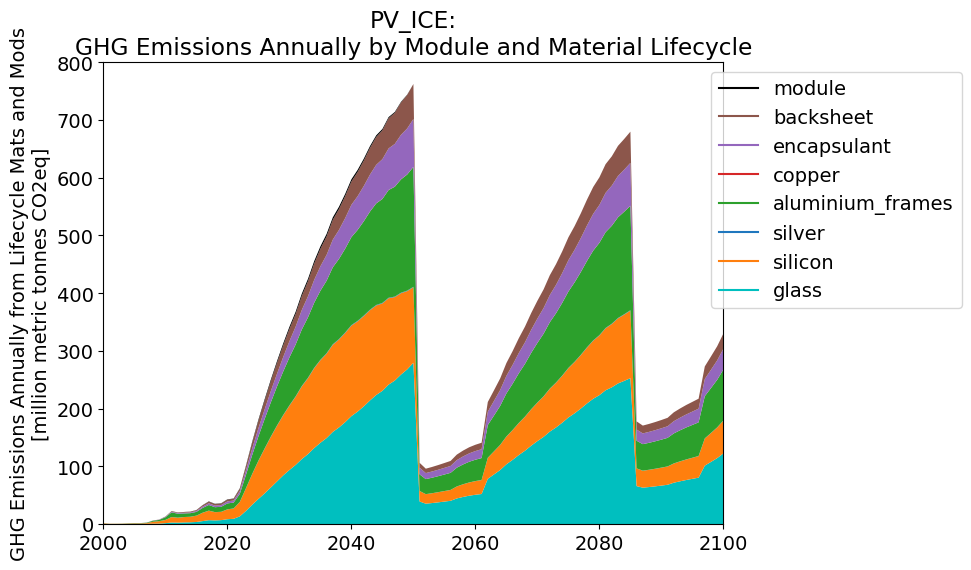

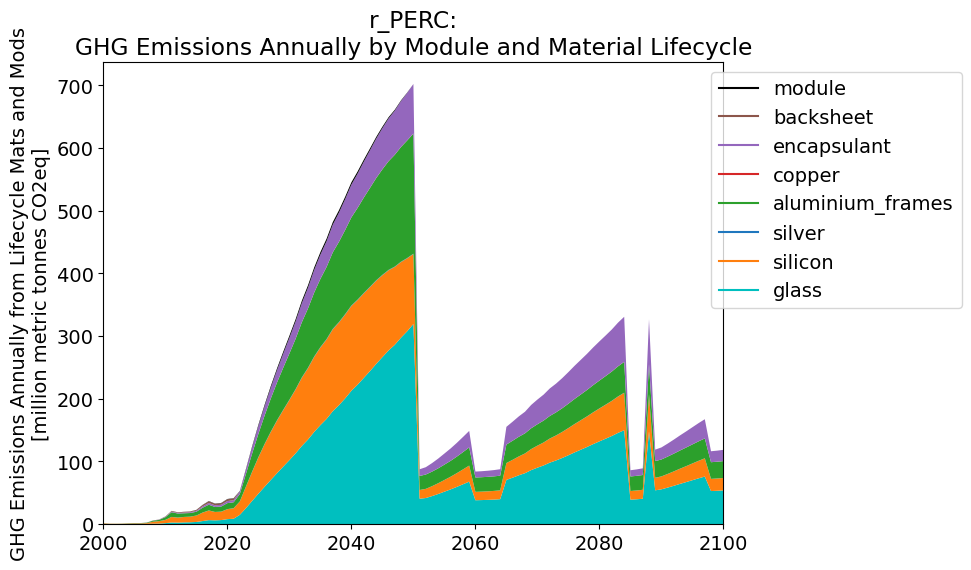

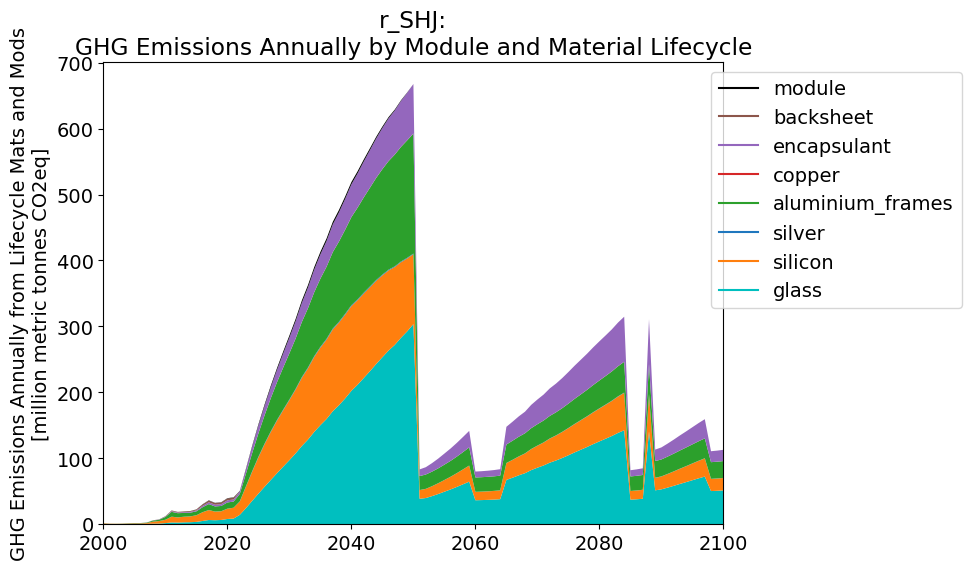

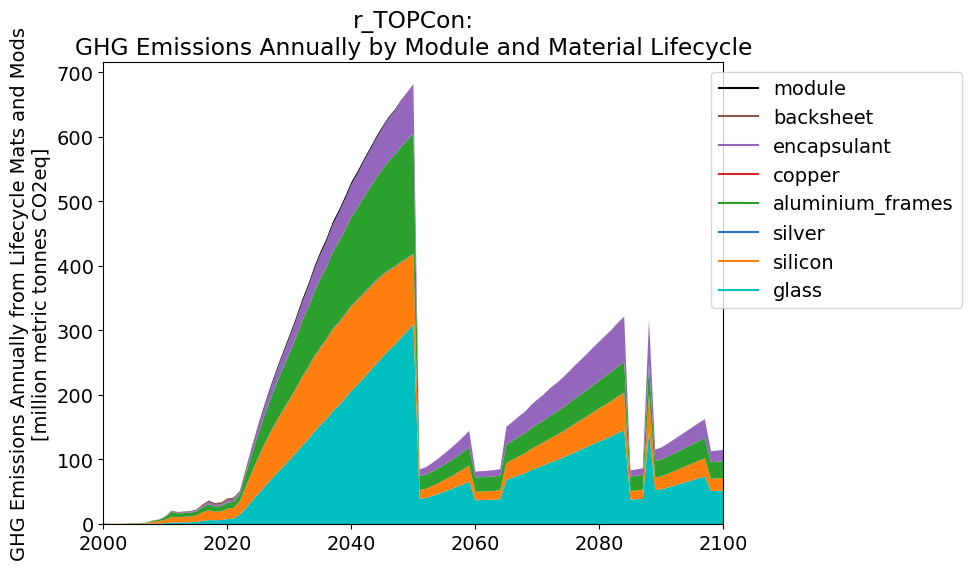

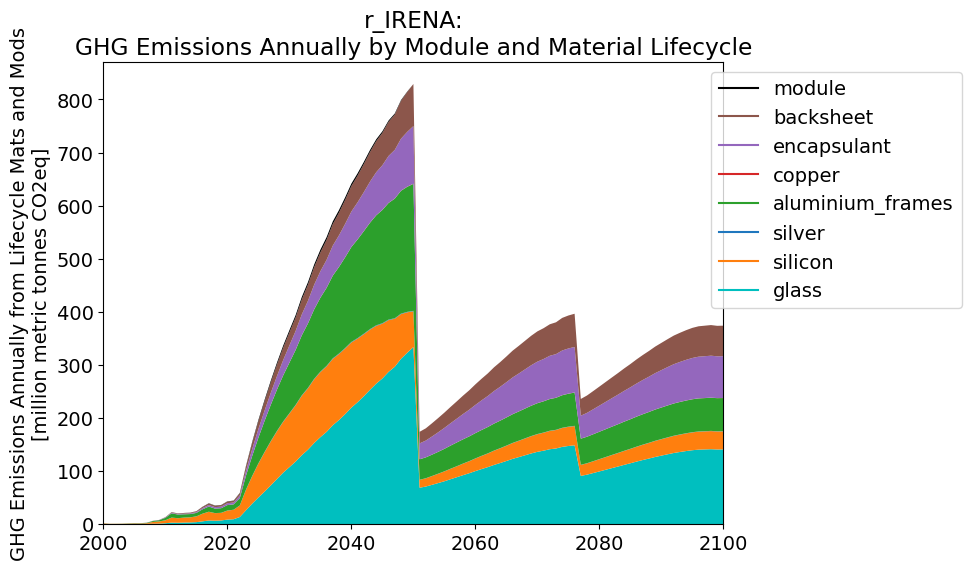

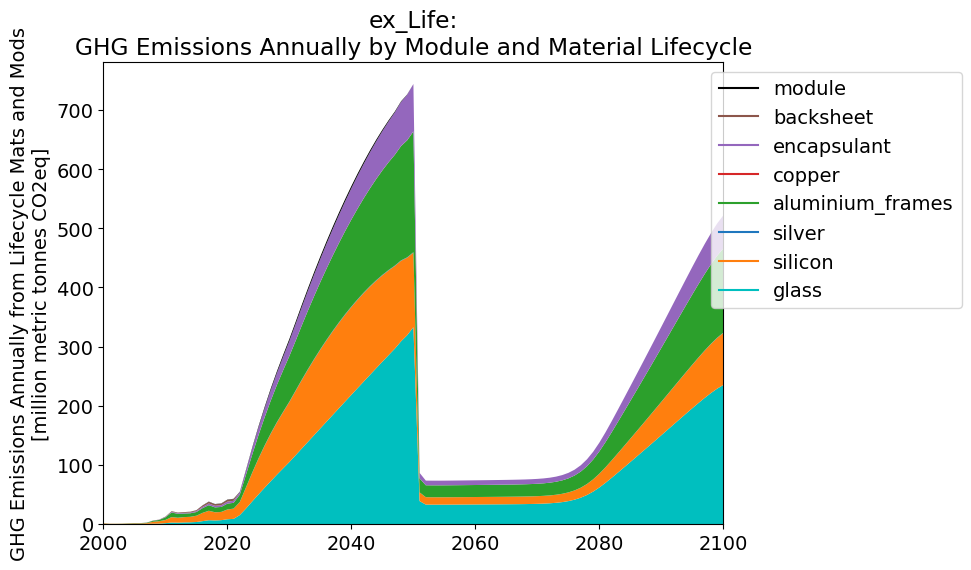

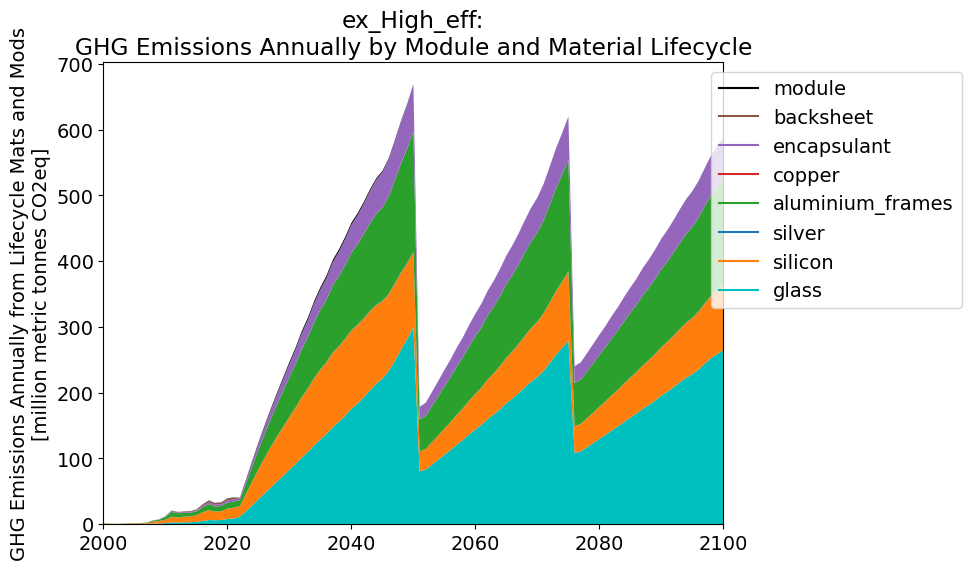

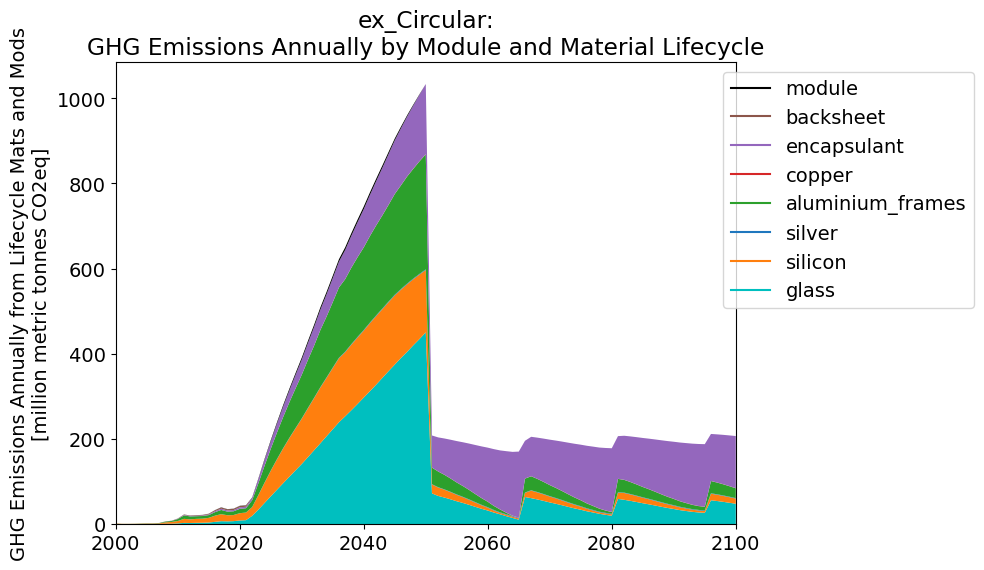

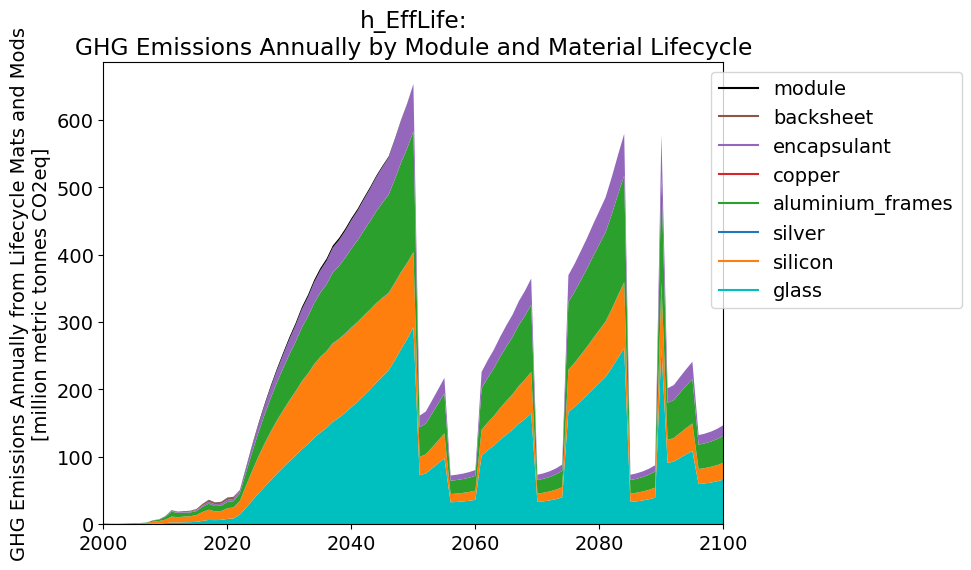

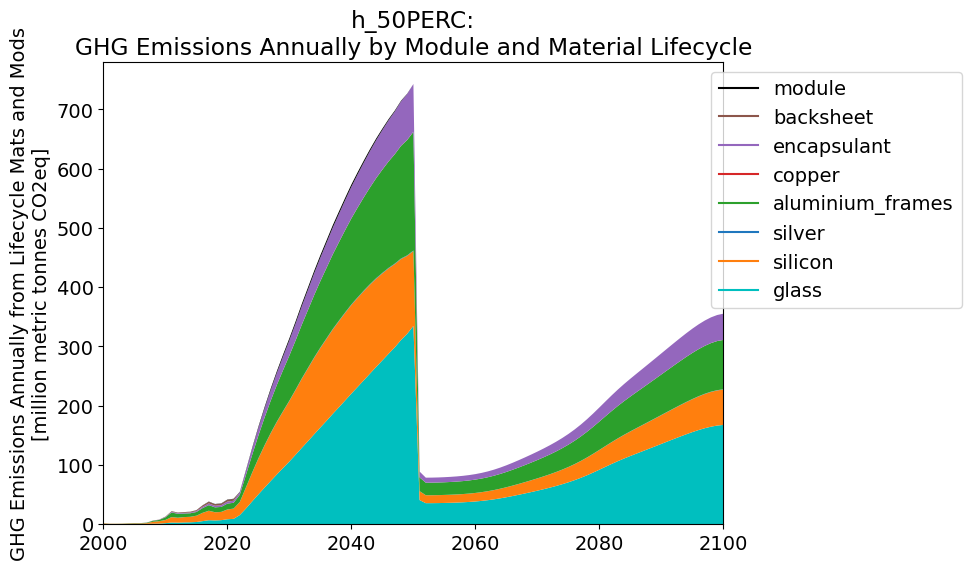

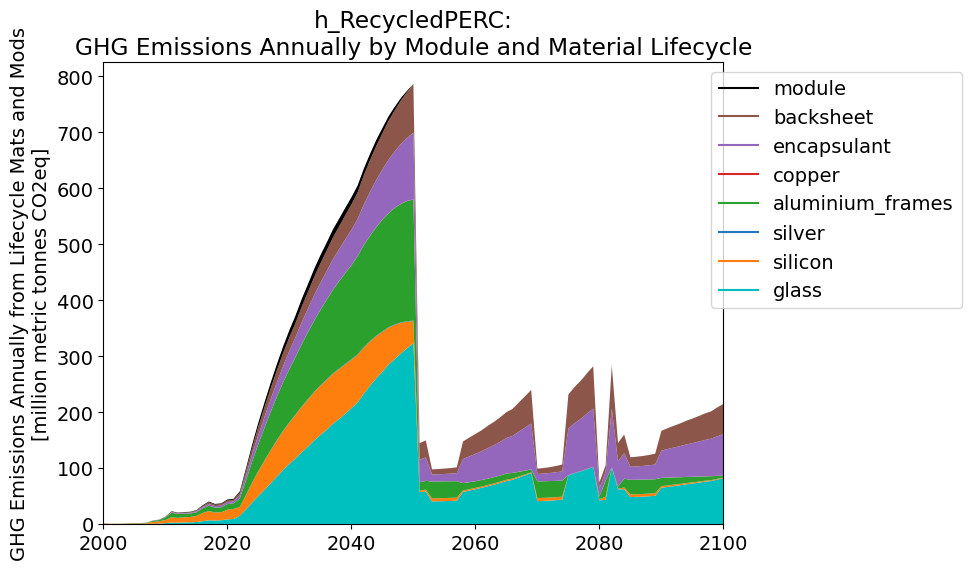

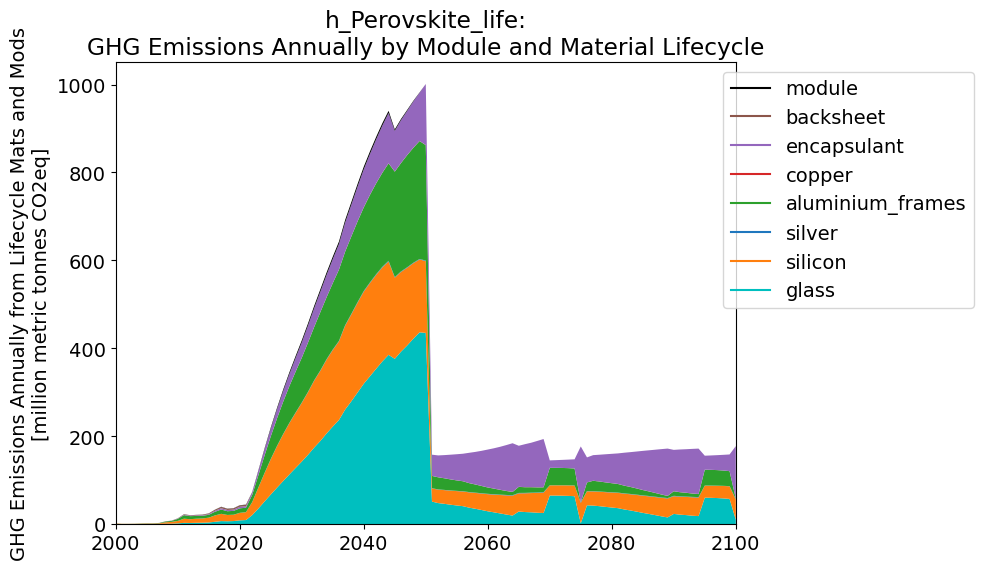

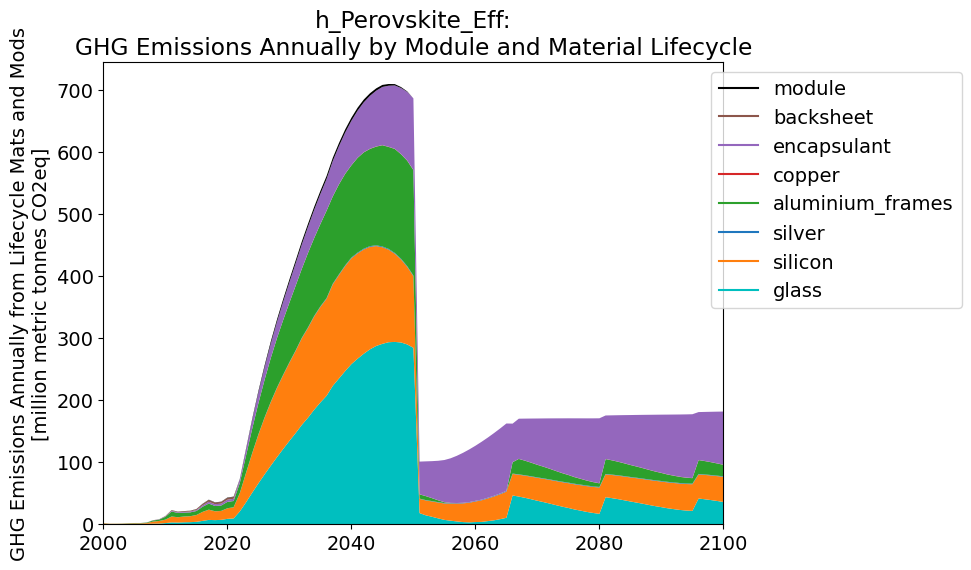

In [19]:
for scen in scenarios:

    scen_annual_carbon = sim_annual_carbon.filter(like='Annual_Emit').filter(like=scen)/1e12 #million tonnes
    
    plt.plot([],[],color=colormats[0], label=MATERIALS[0])
    plt.plot([],[],color=colormats[1], label=MATERIALS[1])
    plt.plot([],[],color=colormats[2], label=MATERIALS[2])
    plt.plot([],[],color=colormats[3], label=MATERIALS[3])
    plt.plot([],[],color=colormats[4], label=MATERIALS[4])
    plt.plot([],[],color=colormats[5], label=MATERIALS[5])
    plt.plot([],[],color=colormats[6], label=MATERIALS[6])
    plt.plot([],[],color=colormats[7], label='module')


    plt.stackplot(scen_annual_carbon.index,
                  scen_annual_carbon[scen+'_Annual_Emit_glass_gCO2eq'], 
                  scen_annual_carbon[scen+'_Annual_Emit_silicon_gCO2eq'],
                  scen_annual_carbon[scen+'_Annual_Emit_silver_gCO2eq'], 
                  scen_annual_carbon[scen+'_Annual_Emit_aluminium_frames_gCO2eq'], 
                  scen_annual_carbon[scen+'_Annual_Emit_copper_gCO2eq'],
                  scen_annual_carbon[scen+'_Annual_Emit_encapsulant_gCO2eq'],
                  scen_annual_carbon[scen+'_Annual_Emit_backsheet_gCO2eq'],
                  scen_annual_carbon[scen+'_Annual_Emit_mod_gCO2eq'],
                  colors = colormats)
    plt.title(scen+':\nGHG Emissions Annually by Module and Material Lifecycle')
    plt.ylabel('GHG Emissions Annually from Lifecycle Mats and Mods\n[million metric tonnes CO2eq]')
    plt.xlim(2000,2100)

    handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
#order = [1,2,0]
#add legend to plot
#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
    plt.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.4,1))

#plt.legend()
    plt.show()

In [20]:
sim_cumu_carbon = sim_annual_carbon.cumsum()
maxy = round(sim_cumu_carbon.loc[2100].filter(like='Annual_Emit_total_modmats').max()/1e12,-3)
sim_cumu_carbon.loc[2100].filter(like='Annual_Emit_total_modmats')

PV_ICE_Annual_Emit_total_modmats_gCO2eq               2.963565e+16
r_PERC_Annual_Emit_total_modmats_gCO2eq               2.126845e+16
r_SHJ_Annual_Emit_total_modmats_gCO2eq                2.024885e+16
r_TOPCon_Annual_Emit_total_modmats_gCO2eq             2.067584e+16
r_IRENA_Annual_Emit_total_modmats_gCO2eq              3.050720e+16
ex_Life_Annual_Emit_total_modmats_gCO2eq              2.274670e+16
ex_High_eff_Annual_Emit_total_modmats_gCO2eq          3.053505e+16
ex_Circular_Annual_Emit_total_modmats_gCO2eq          2.721381e+16
h_EffLife_Annual_Emit_total_modmats_gCO2eq            2.295700e+16
h_50PERC_Annual_Emit_total_modmats_gCO2eq             2.264909e+16
h_RecycledPERC_Annual_Emit_total_modmats_gCO2eq       2.254946e+16
h_Perovskite_life_Annual_Emit_total_modmats_gCO2eq    2.653388e+16
h_Perovskite_Eff_Annual_Emit_total_modmats_gCO2eq     2.293411e+16
Name: 2100, dtype: float64

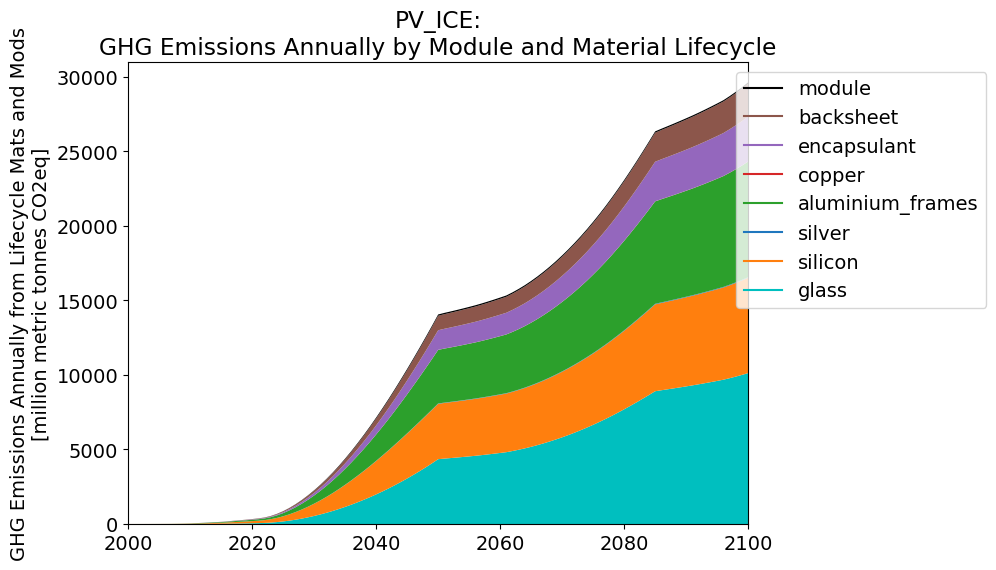

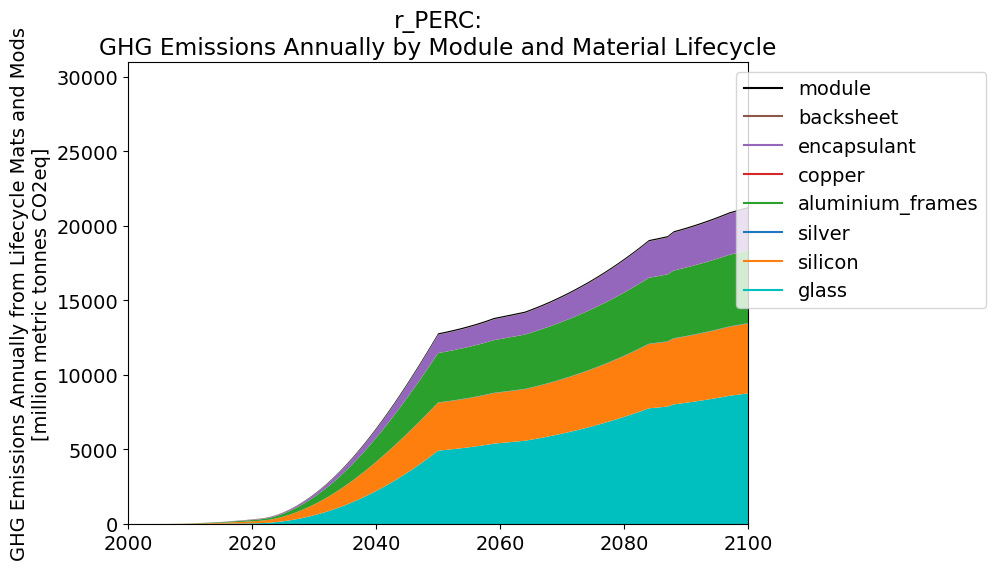

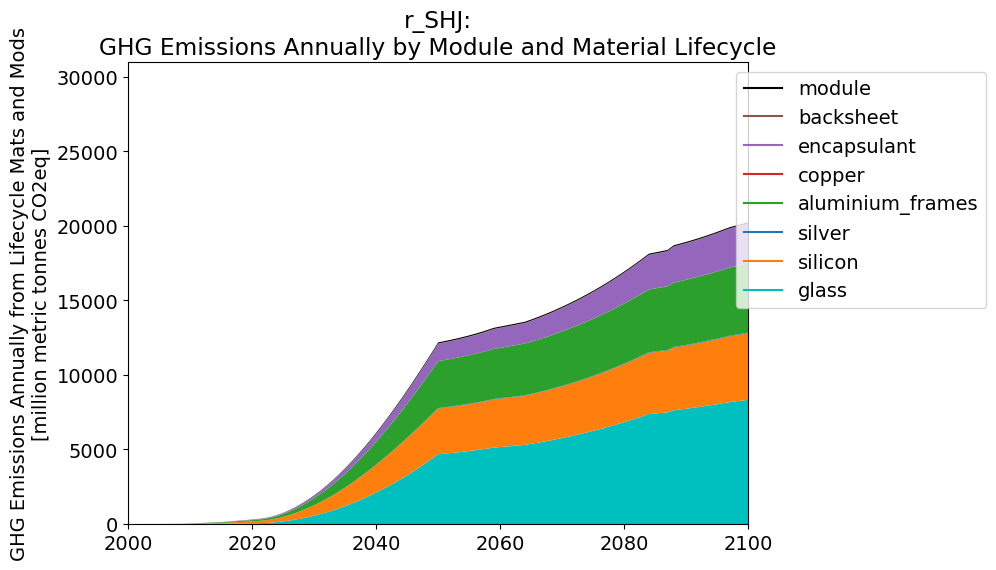

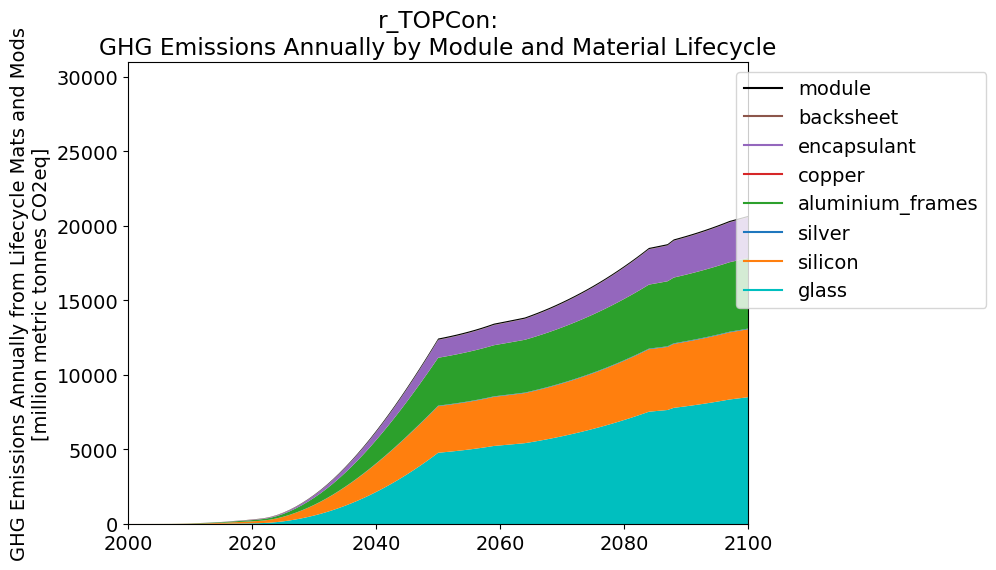

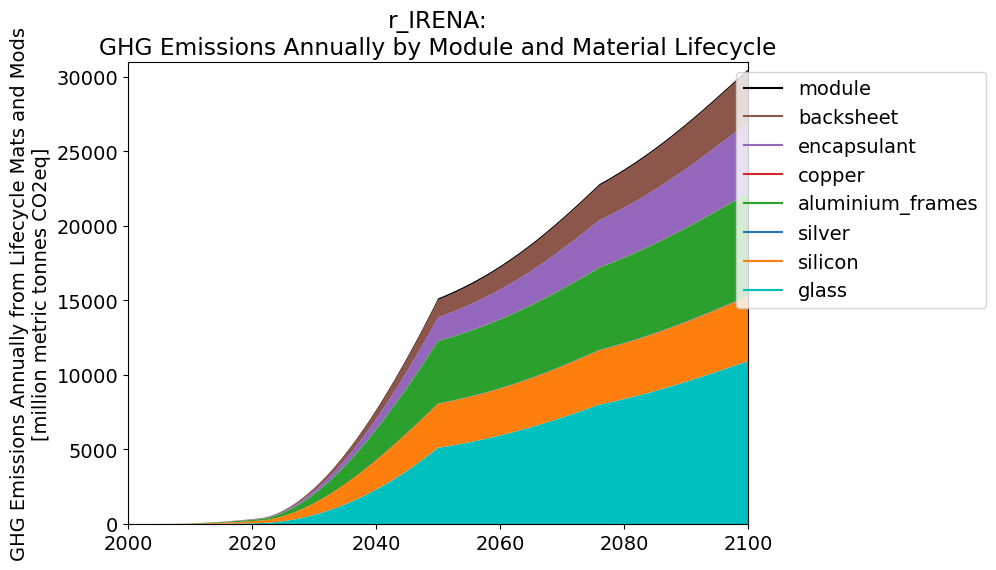

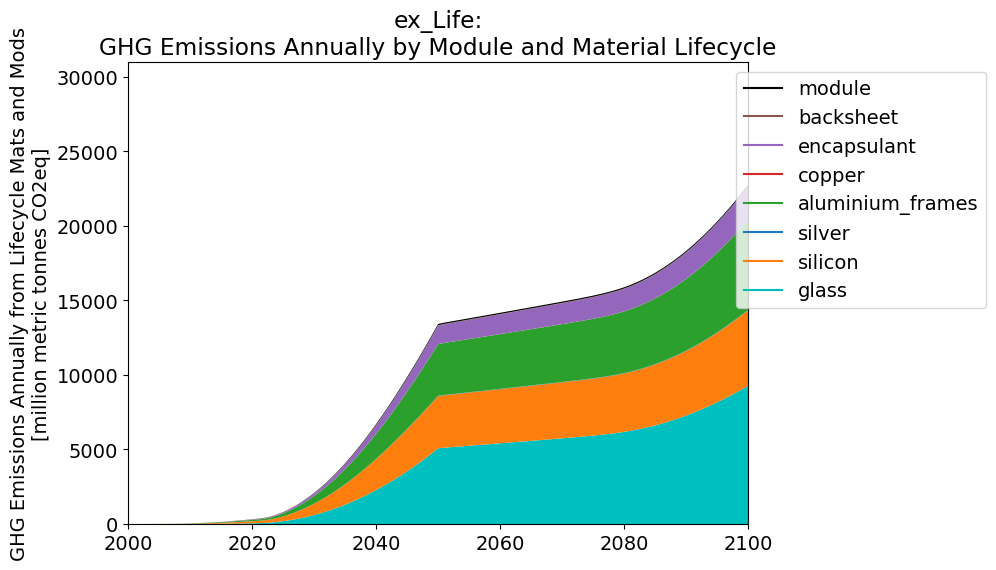

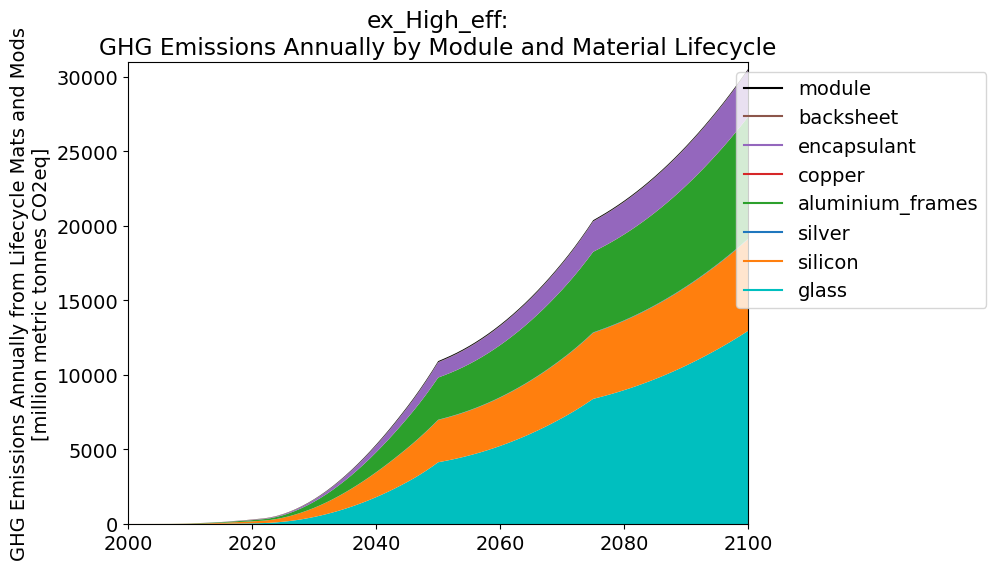

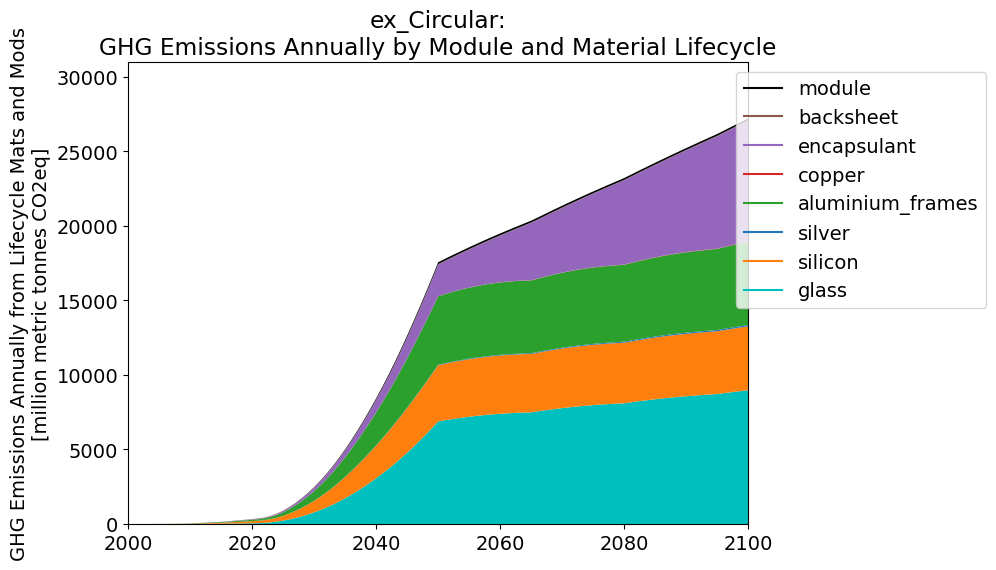

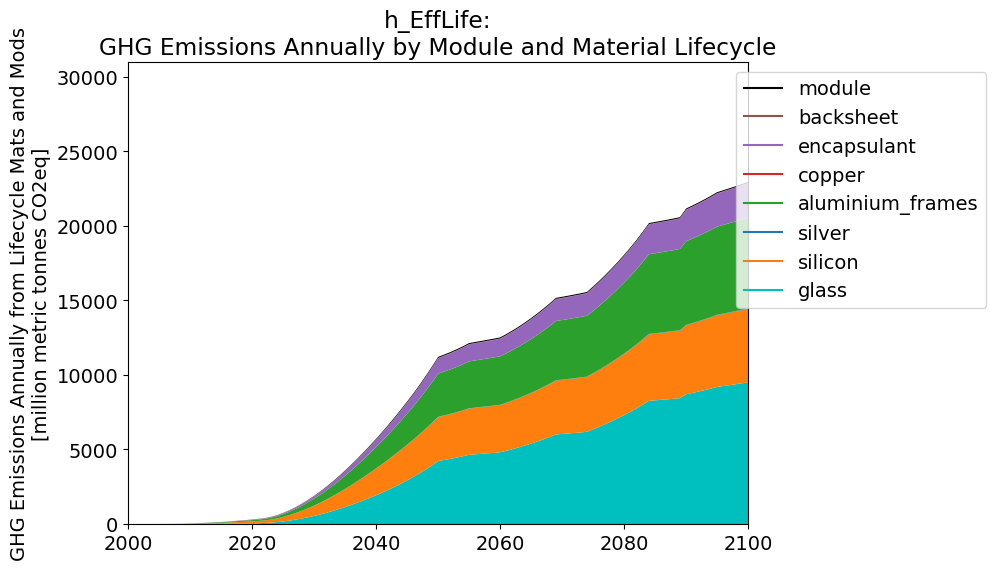

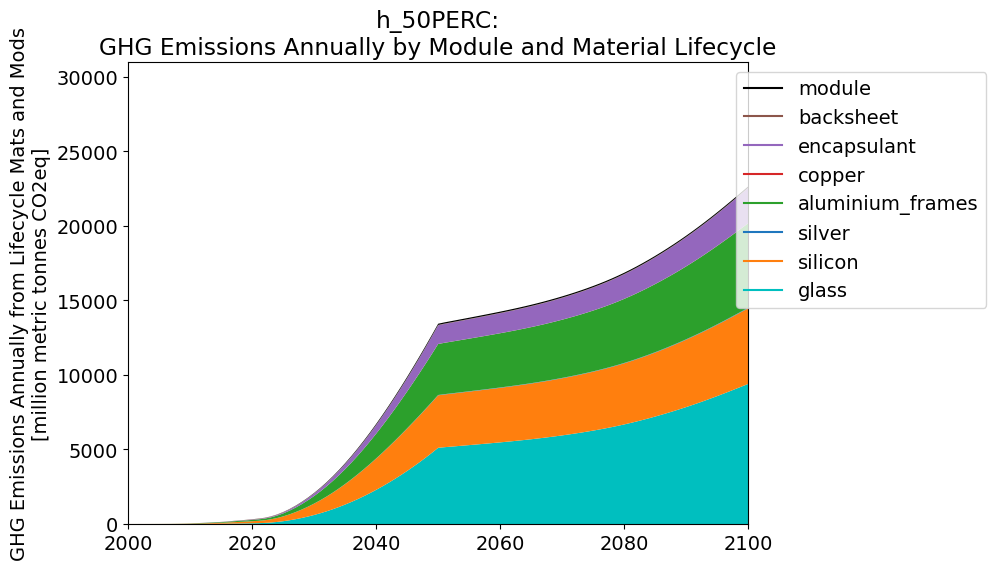

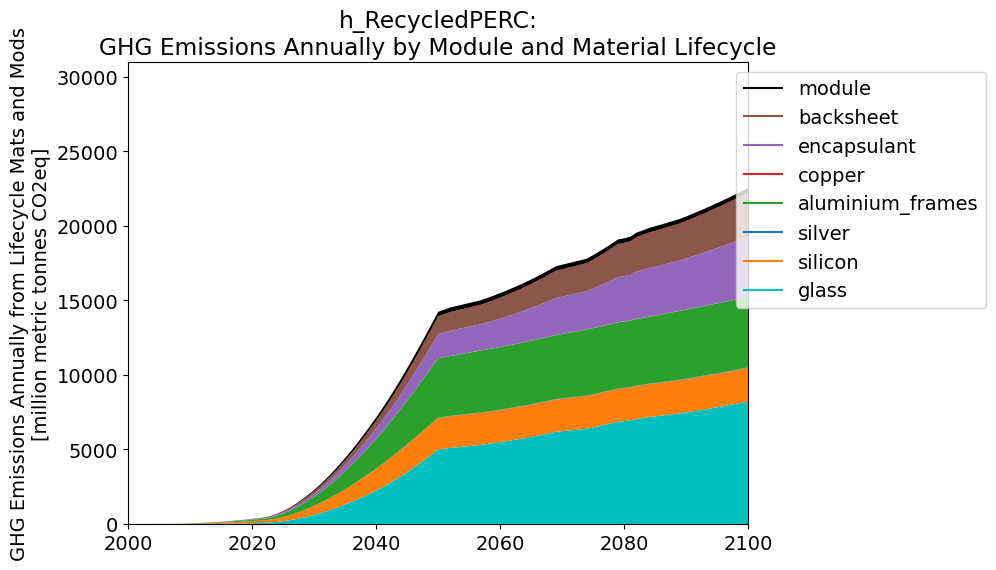

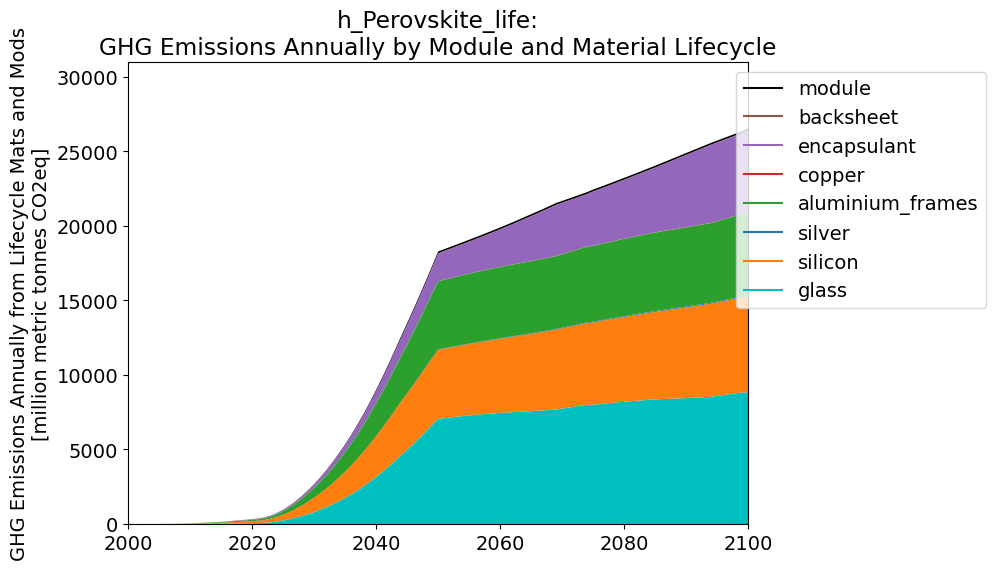

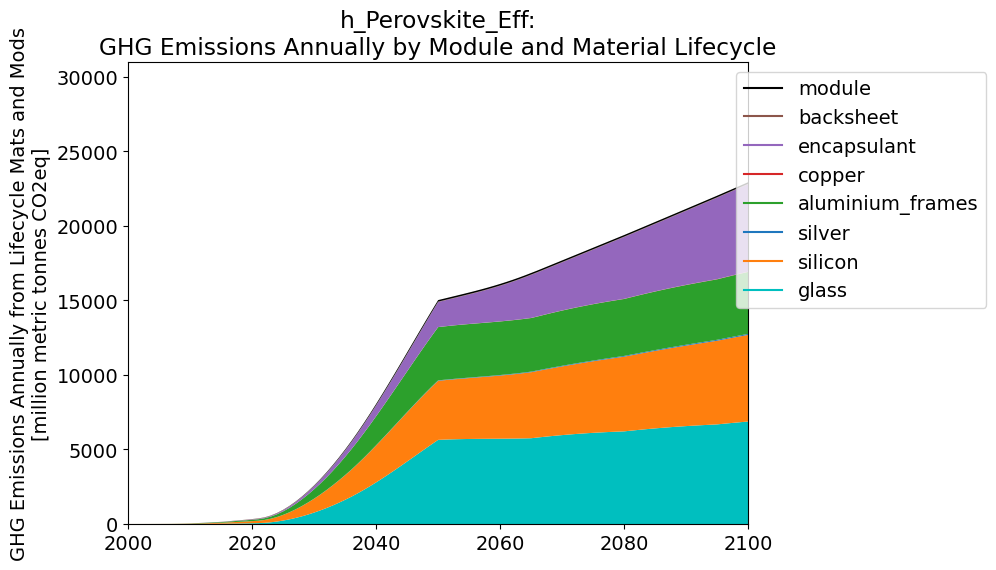

In [21]:
colormats = ['#00bfbf','#ff7f0e','#1f77be','#2ca02c','#d62728','#9467BD','#8C564B','black'] #colors for material plots
for scen in scenarios:

    scen_cumu_carbon = sim_cumu_carbon.filter(like='Annual_Emit').filter(like=scen)/1e12 #million tonnes
    
    plt.plot([],[],color=colormats[0], label=MATERIALS[0])
    plt.plot([],[],color=colormats[1], label=MATERIALS[1])
    plt.plot([],[],color=colormats[2], label=MATERIALS[2])
    plt.plot([],[],color=colormats[3], label=MATERIALS[3])
    plt.plot([],[],color=colormats[4], label=MATERIALS[4])
    plt.plot([],[],color=colormats[5], label=MATERIALS[5])
    plt.plot([],[],color=colormats[6], label=MATERIALS[6])
    plt.plot([],[],color=colormats[7], label='module')


    plt.stackplot(scen_cumu_carbon.index,
                  scen_cumu_carbon[scen+'_Annual_Emit_glass_gCO2eq'], 
                  scen_cumu_carbon[scen+'_Annual_Emit_silicon_gCO2eq'],
                  scen_cumu_carbon[scen+'_Annual_Emit_silver_gCO2eq'], 
                  scen_cumu_carbon[scen+'_Annual_Emit_aluminium_frames_gCO2eq'], 
                  scen_cumu_carbon[scen+'_Annual_Emit_copper_gCO2eq'],
                  scen_cumu_carbon[scen+'_Annual_Emit_encapsulant_gCO2eq'],
                  scen_cumu_carbon[scen+'_Annual_Emit_backsheet_gCO2eq'],
                  scen_cumu_carbon[scen+'_Annual_Emit_mod_gCO2eq'],
                  colors = colormats)
    plt.title(scen+':\nGHG Emissions Annually by Module and Material Lifecycle')
    plt.ylabel('GHG Emissions Annually from Lifecycle Mats and Mods\n[million metric tonnes CO2eq]')
    plt.xlim(2000,2100)
    plt.ylim(0,maxy)

    handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
#order = [1,2,0]
#add legend to plot
#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
    plt.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.4,1))

#plt.legend()
    plt.show()

In [22]:
sim_cumu_carbon

,PV_ICE_Annual_Emit_mod_gCO2eq,PV_ICE_Annual_Emit_glass_gCO2eq,PV_ICE_Annual_Emit_silicon_gCO2eq,PV_ICE_Annual_Emit_silver_gCO2eq,PV_ICE_Annual_Emit_aluminium_frames_gCO2eq,PV_ICE_Annual_Emit_copper_gCO2eq,PV_ICE_Annual_Emit_encapsulant_gCO2eq,PV_ICE_Annual_Emit_backsheet_gCO2eq,PV_ICE_Annual_Emit_total_modmats_gCO2eq,r_PERC_Annual_Emit_mod_gCO2eq,...,h_Perovskite_life_Annual_Emit_total_modmats_gCO2eq,h_Perovskite_Eff_Annual_Emit_mod_gCO2eq,h_Perovskite_Eff_Annual_Emit_glass_gCO2eq,h_Perovskite_Eff_Annual_Emit_silicon_gCO2eq,h_Perovskite_Eff_Annual_Emit_silver_gCO2eq,h_Perovskite_Eff_Annual_Emit_aluminium_frames_gCO2eq,h_Perovskite_Eff_Annual_Emit_copper_gCO2eq,h_Perovskite_Eff_Annual_Emit_encapsulant_gCO2eq,h_Perovskite_Eff_Annual_Emit_backsheet_gCO2eq,h_Perovskite_Eff_Annual_Emit_total_modmats_gCO2eq
2000,1.302635e+10,7.926511e+10,9.851568e+11,1.806152e+10,2.951140e+11,1.095485e+08,3.144897e+10,1.445429e+10,1.436637e+12,1.132197e+10,...,1.436637e+12,1.302635e+10,7.926511e+10,9.851568e+11,1.806152e+10,2.951140e+11,1.095485e+08,3.144897e+10,1.445429e+10,1.436637e+12
2001,1.765591e+10,1.071198e+11,1.297904e+12,2.408112e+10,3.999794e+11,1.466912e+08,4.262252e+10,1.972716e+10,1.909237e+12,1.648577e+10,...,1.909237e+12,1.765591e+10,1.071198e+11,1.297904e+12,2.408112e+10,3.999794e+11,1.466912e+08,4.262252e+10,1.972716e+10,1.909237e+12
2002,2.333327e+10,1.403331e+11,1.611551e+12,3.098442e+10,5.248225e+11,1.912913e+08,5.610222e+10,2.626124e+10,2.413579e+12,2.179171e+10,...,2.413579e+12,2.333327e+10,1.403331e+11,1.611551e+12,3.098442e+10,5.248225e+11,1.912913e+08,5.610222e+10,2.626124e+10,2.413579e+12
2003,3.216826e+10,1.903309e+11,2.003080e+12,4.102774e+10,7.171775e+11,2.602262e+08,7.661591e+10,3.646293e+10,3.097123e+12,3.004872e+10,...,3.097123e+12,3.216826e+10,1.903309e+11,2.003080e+12,4.102774e+10,7.171775e+11,2.602262e+08,7.661591e+10,3.646293e+10,3.097123e+12
2004,4.977404e+10,2.906310e+11,2.656899e+12,6.048733e+10,1.094709e+12,4.034545e+08,1.182876e+11,5.766972e+10,4.328861e+12,4.650269e+10,...,4.328861e+12,4.977404e+10,2.906310e+11,2.656899e+12,6.048733e+10,1.094709e+12,4.034545e+08,1.182876e+11,5.766972e+10,4.328861e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096,8.661511e+13,9.681365e+15,6.186923e+15,3.830767e+13,7.434280e+15,8.232011e+12,2.882390e+15,2.116173e+15,2.843429e+16,7.955485e+13,...,2.588437e+16,1.055897e+14,6.725123e+15,5.651124e+15,6.575802e+13,4.077729e+15,1.502691e+13,5.546502e+15,2.325043e+13,2.221010e+16
2097,8.661511e+13,9.782482e+15,6.233863e+15,3.859118e+13,7.507335e+15,8.305166e+12,2.912165e+15,2.137900e+15,2.870726e+16,7.955485e+13,...,2.604102e+16,1.055897e+14,6.765008e+15,5.690372e+15,6.651118e+13,4.099235e+15,1.522125e+13,5.625601e+15,2.325043e+13,2.239079e+16
2098,8.661511e+13,9.890074e+15,6.283796e+15,3.889277e+13,7.585002e+15,8.382985e+12,2.943838e+15,2.161013e+15,2.899762e+16,7.955485e+13,...,2.619843e+16,1.055897e+14,6.803572e+15,5.730015e+15,6.728376e+13,4.119829e+15,1.542060e+13,5.706738e+15,2.325043e+13,2.257170e+16
2099,8.661511e+13,1.000423e+16,6.336764e+15,3.921269e+13,7.667346e+15,8.465533e+12,2.977437e+15,2.185530e+15,2.930560e+16,7.955485e+13,...,2.635667e+16,1.055897e+14,6.840671e+15,5.770083e+15,6.807751e+13,4.139413e+15,1.562540e+13,5.790099e+15,2.325043e+13,2.275281e+16


In [23]:
#create a df from which to do a bar chart of 2100 emissions by mat/mod
mats_emit_2100 = pd.DataFrame() #index=scennames_labels_flat
for mat in MATERIALS:
    mat_emit_2100 = pd.Series(sim_cumu_carbon.loc[2100].filter(like=mat).values)
    mats_emit_2100 = pd.concat([mats_emit_2100, mat_emit_2100], axis=1)

mats_emit_2100
mats_emit_2100.columns = MATERIALS
modmats_emit_2100 = pd.concat([mats_emit_2100,pd.Series(sim_cumu_carbon.loc[2100].filter(like='mod_').values)], axis=1)
modmats_emit_2100.index = scennames_labels_flat
modmats_emit_2100.rename(columns={0:'module'}, inplace=True)
modmats_emit_2100_megatonne = modmats_emit_2100/1e12
modmats_emit_2100_megatonne

,glass,silicon,silver,aluminium_frames,copper,encapsulant,backsheet,module
PV_ICE,10126.610037,6393.528822,39.555545,7755.542240,8.553999,3013.443849,2211.805161,86.615111
PERC,8762.994612,4692.866948,25.191311,4878.062693,7.933845,2800.113453,21.729228,79.554845
SHJ,8331.662313,4465.729982,44.794737,4639.401770,7.545504,2662.628153,21.330504,75.758903
TOPCon,8509.280286,4559.621644,43.333633,4737.762881,7.705695,2719.277076,21.528020,77.335447
Low Quality,10920.089504,4341.113961,40.635431,6893.787669,12.970040,4731.060652,3466.044108,101.496270
Long-Lived,9270.300486,5078.154692,29.471217,6013.561653,6.784228,2244.838020,22.463092,81.124534
High Eff,12963.265245,6145.955317,38.732726,8176.783647,8.755677,3115.456836,21.291503,64.810392
Circular,8977.849914,4281.988316,92.251404,5569.326850,21.597082,8123.698405,23.250434,123.842906
High Eff + Long-life,9507.951929,4926.966042,31.290604,6098.983123,6.741955,2295.131175,21.291435,68.646424
Long-Life + Recycling,9400.037004,5075.691113,32.719877,5668.840797,6.882528,2360.827092,22.463337,81.633002


C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_10592\3009395773.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(labels=scennames_labels[0:5], rotation=45)
C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_10592\3009395773.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels=scennames_labels[5:8], rotation=45)
C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_10592\3009395773.py:68: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(labels=scennames_labels[8:], rotation=45)


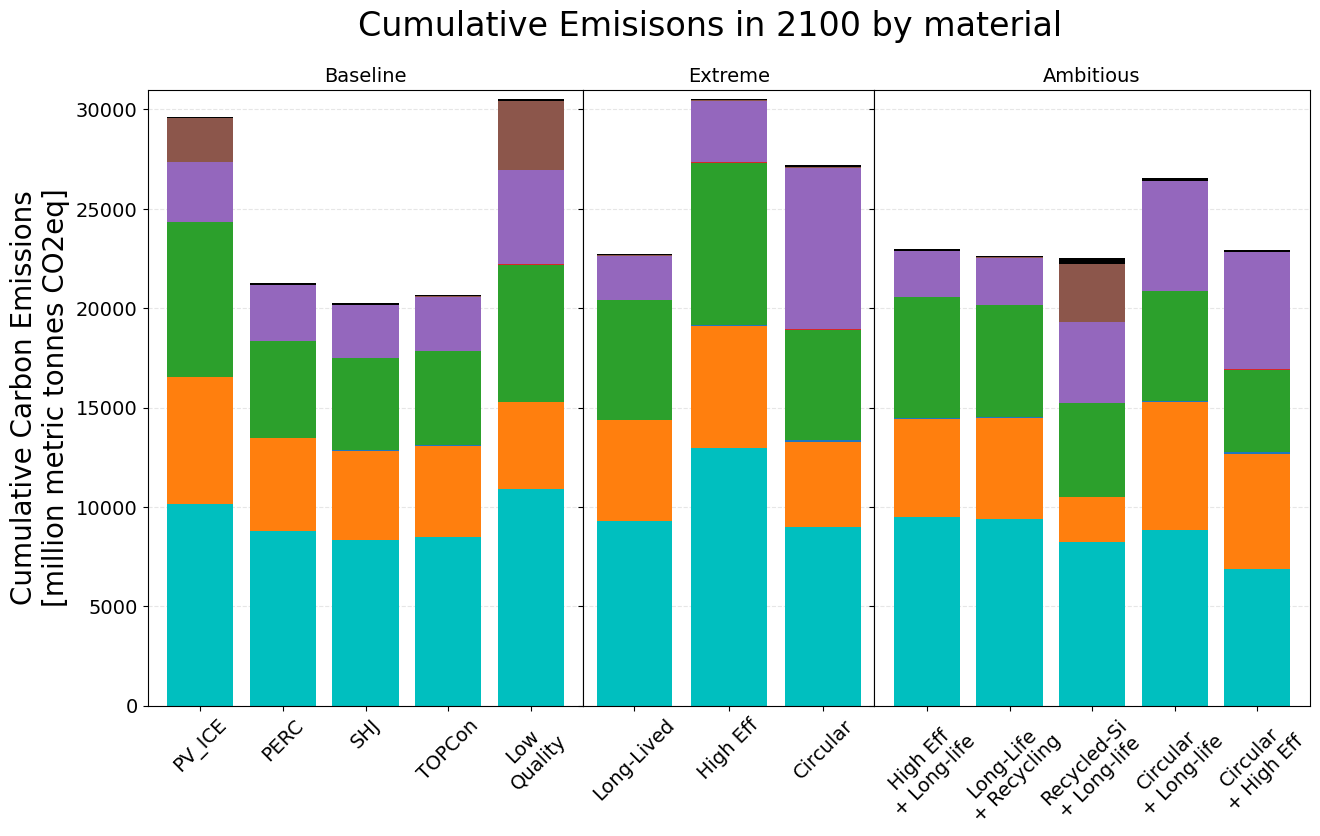

In [24]:
fig_cumuemit_modmat, (ax0,ax2,ax3) = plt.subplots(1,3,figsize=(15,8), sharey=True, 
                                      gridspec_kw={'wspace': 0, 'width_ratios': [1.5,1,1.5]})
#BAU
ax0.bar(scennames_labels[0:5], modmats_emit_2100_megatonne[0:5]['glass'], color=colormats[0])
ax0.bar(scennames_labels[0:5], modmats_emit_2100_megatonne[0:5]['silicon'],
        bottom=modmats_emit_2100_megatonne[0:5]['glass'], color=colormats[1])
ax0.bar(scennames_labels[0:5], modmats_emit_2100_megatonne[0:5]['silver'],
       bottom=modmats_emit_2100_megatonne.iloc[0:5,0:2].sum(axis=1), color=colormats[2])
ax0.bar(scennames_labels[0:5], modmats_emit_2100_megatonne[0:5]['aluminium_frames'],
       bottom=modmats_emit_2100_megatonne.iloc[0:5,0:3].sum(axis=1), color=colormats[3])
ax0.bar(scennames_labels[0:5], modmats_emit_2100_megatonne[0:5]['copper'],
       bottom=modmats_emit_2100_megatonne.iloc[0:5,0:4].sum(axis=1), color=colormats[4])
ax0.bar(scennames_labels[0:5], modmats_emit_2100_megatonne[0:5]['encapsulant'],
       bottom=modmats_emit_2100_megatonne.iloc[0:5,0:5].sum(axis=1), color=colormats[5])
ax0.bar(scennames_labels[0:5], modmats_emit_2100_megatonne[0:5]['backsheet'],
       bottom=modmats_emit_2100_megatonne.iloc[0:5,0:6].sum(axis=1), color=colormats[6])
ax0.bar(scennames_labels[0:5], modmats_emit_2100_megatonne[0:5]['module'],
       bottom=modmats_emit_2100_megatonne.iloc[0:5,0:7].sum(axis=1), color='black')

ax0.set_ylim(0,31000)
ax0.set_ylabel('Cumulative Carbon Emissions\n[million metric tonnes CO2eq]', fontsize=20)
ax0.set_title('Baseline', fontsize=14)
ax0.set_xticklabels(labels=scennames_labels[0:5], rotation=45)
ax0.grid(axis='y', color='0.9', ls='--') 
ax0.set_axisbelow(True)

#Extreme
ax2.bar(scennames_labels[5:8], modmats_emit_2100_megatonne[5:8]['glass'], color=colormats[0])
ax2.bar(scennames_labels[5:8], modmats_emit_2100_megatonne[5:8]['silicon'],
        bottom=modmats_emit_2100_megatonne[5:8]['glass'], color=colormats[1])
ax2.bar(scennames_labels[5:8], modmats_emit_2100_megatonne[5:8]['silver'],
       bottom=modmats_emit_2100_megatonne.iloc[5:8,0:2].sum(axis=1), color=colormats[2])
ax2.bar(scennames_labels[5:8], modmats_emit_2100_megatonne[5:8]['aluminium_frames'],
       bottom=modmats_emit_2100_megatonne.iloc[5:8,0:3].sum(axis=1), color=colormats[3])
ax2.bar(scennames_labels[5:8], modmats_emit_2100_megatonne[5:8]['copper'],
       bottom=modmats_emit_2100_megatonne.iloc[5:8,0:4].sum(axis=1), color=colormats[4])
ax2.bar(scennames_labels[5:8], modmats_emit_2100_megatonne[5:8]['encapsulant'],
       bottom=modmats_emit_2100_megatonne.iloc[5:8,0:5].sum(axis=1), color=colormats[5])
ax2.bar(scennames_labels[5:8], modmats_emit_2100_megatonne[5:8]['backsheet'],
       bottom=modmats_emit_2100_megatonne.iloc[5:8,0:6].sum(axis=1), color=colormats[6])
ax2.bar(scennames_labels[5:8], modmats_emit_2100_megatonne[5:8]['module'],
       bottom=modmats_emit_2100_megatonne.iloc[5:8,0:7].sum(axis=1), color='black')

ax2.set_title('Extreme', fontsize=14)
ax2.set_xticklabels(labels=scennames_labels[5:8], rotation=45)
ax2.grid(axis='y', color='0.9', ls='--') 
ax2.set_axisbelow(True)

#Ambitious
ax3.bar(scennames_labels[8:], modmats_emit_2100_megatonne[8:]['glass'], color=colormats[0])
ax3.bar(scennames_labels[8:], modmats_emit_2100_megatonne[8:]['silicon'],
        bottom=modmats_emit_2100_megatonne[8:]['glass'], color=colormats[1])
ax3.bar(scennames_labels[8:], modmats_emit_2100_megatonne[8:]['silver'],
       bottom=modmats_emit_2100_megatonne.iloc[8:,0:2].sum(axis=1), color=colormats[2])
ax3.bar(scennames_labels[8:], modmats_emit_2100_megatonne[8:]['aluminium_frames'],
       bottom=modmats_emit_2100_megatonne.iloc[8:,0:3].sum(axis=1), color=colormats[3])
ax3.bar(scennames_labels[8:], modmats_emit_2100_megatonne[8:]['copper'],
       bottom=modmats_emit_2100_megatonne.iloc[8:,0:4].sum(axis=1), color=colormats[4])
ax3.bar(scennames_labels[8:], modmats_emit_2100_megatonne[8:]['encapsulant'],
       bottom=modmats_emit_2100_megatonne.iloc[8:,0:5].sum(axis=1), color=colormats[5])
ax3.bar(scennames_labels[8:], modmats_emit_2100_megatonne[8:]['backsheet'],
       bottom=modmats_emit_2100_megatonne.iloc[8:,0:6].sum(axis=1), color=colormats[6])
ax3.bar(scennames_labels[8:], modmats_emit_2100_megatonne[8:]['module'],
       bottom=modmats_emit_2100_megatonne.iloc[8:,0:7].sum(axis=1), color='black')


ax3.set_title('Ambitious', fontsize=14)
ax3.set_xticklabels(labels=scennames_labels[8:], rotation=45)
ax3.grid(axis='y', color='0.9', ls='--') 
ax3.set_axisbelow(True)

#overall fig

fig_cumuemit_modmat.suptitle('Cumulative Emisisons in 2100 by material', fontsize=24)
plt.show()

#fig_cumuemit_modmat.savefig('energyresults-energyBalance.png', dpi=300, bbox_inches='tight')

# Cumulative Carbon in 2050 and 2100

In [25]:
#mins in 2050 and 2100
cumu_carbon_2050 = sim_cumu_carbon.loc[2050].filter(like='Annual_Emit_total_modmats')/1e12
cumu_carbon_2100 = sim_cumu_carbon.loc[2100].filter(like='Annual_Emit_total_modmats')/1e12
cumu_carbon_rankings_crittime = pd.concat([cumu_carbon_2050,cumu_carbon_2100], axis=1)
cumu_carbon_rankings_crittime.index = scennames_labels_flat
cumu_carbon_rankings_crittime

,2050,2100
PV_ICE,14058.924952,29635.654765
PERC,12794.376877,21268.446936
SHJ,12187.971284,20248.851865
TOPCon,12443.042440,20675.844681
Low Quality,15135.691476,30507.197634
Long-Lived,13425.138619,22746.697922
High Eff,10927.903114,30535.051343
Circular,17562.405463,27213.805311
High Eff + Long-life,11214.153373,22957.002686
Long-Life + Recycling,13438.818720,22649.094749


In [26]:
cumu_carbon_rankings_crittime_plot = cumu_carbon_rankings_crittime.copy()
cumu_carbon_rankings_crittime_plot['diff'] = cumu_carbon_rankings_crittime[2100]-cumu_carbon_rankings_crittime[2050]

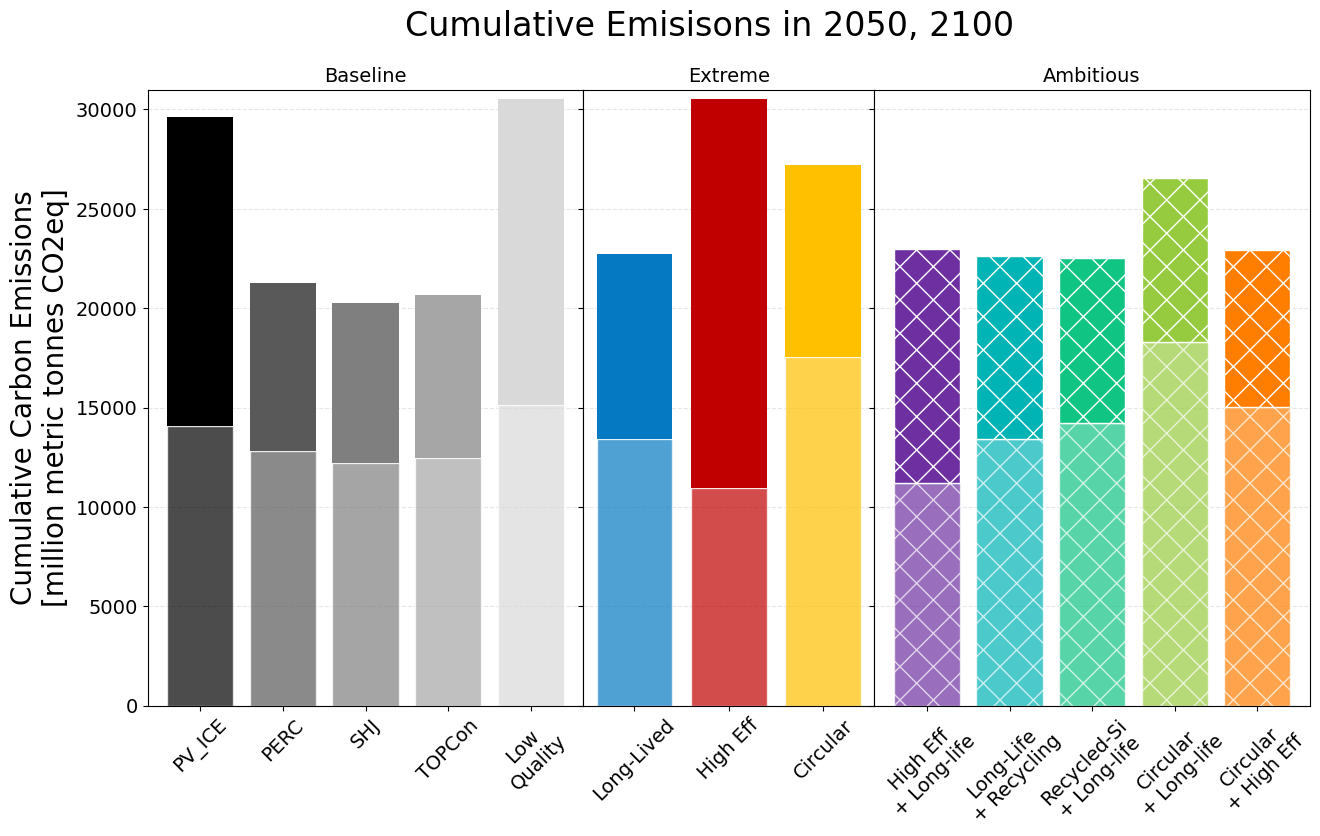

In [27]:

fig_cumulativeemit, (ax0,ax2,ax3) = plt.subplots(1,3,figsize=(15,8), sharey=True, 
                                      gridspec_kw={'wspace': 0, 'width_ratios': [1.5,1,1.5]})
#BAU
ax0.bar(cumu_carbon_rankings_crittime_plot.index[0:5], cumu_carbon_rankings_crittime_plot[2050].iloc[0:5],
        tick_label=scennames_labels[0:5], color=colorpalette[0:5], alpha = 0.7, edgecolor='white')
ax0.bar(cumu_carbon_rankings_crittime_plot.index[0:5], cumu_carbon_rankings_crittime_plot['diff'].iloc[0:5],
        bottom=cumu_carbon_rankings_crittime_plot[2050].iloc[0:5],
        tick_label=scennames_labels[0:5], color=colorpalette[0:5])
ax0.set_ylim(0,31000)
ax0.set_ylabel('Cumulative Carbon Emissions\n[million metric tonnes CO2eq]', fontsize=20)
ax0.set_title('Baseline', fontsize=14)
ax0.set_xticklabels(labels=scennames_labels[0:5], rotation=45)
ax0.grid(axis='y', color='0.9', ls='--') 
ax0.set_axisbelow(True)

#Extreme
ax2.bar(cumu_carbon_rankings_crittime_plot.index[5:8], cumu_carbon_rankings_crittime_plot[2050].iloc[5:8],
        tick_label=scennames_labels[5:8], color=colorpalette[5:8], alpha = 0.7, edgecolor='white')
ax2.bar(cumu_carbon_rankings_crittime_plot.index[5:8], cumu_carbon_rankings_crittime_plot['diff'].iloc[5:8],
        bottom=cumu_carbon_rankings_crittime_plot[2050].iloc[5:8],
        tick_label=scennames_labels[5:8], color=colorpalette[5:8])
ax2.set_title('Extreme', fontsize=14)
ax2.set_xticklabels(labels=scennames_labels[5:8], rotation=45)
ax2.grid(axis='y', color='0.9', ls='--') 
ax2.set_axisbelow(True)

#Ambitious
ax3.bar(cumu_carbon_rankings_crittime_plot.index[8:], cumu_carbon_rankings_crittime_plot[2050].iloc[8:],
        tick_label=scennames_labels[8:], color=colorpalette[8:], hatch='x', edgecolor='white', alpha=0.7)
ax3.bar(cumu_carbon_rankings_crittime_plot.index[8:], cumu_carbon_rankings_crittime_plot['diff'].iloc[8:],
        bottom=cumu_carbon_rankings_crittime_plot[2050].iloc[8:],
        tick_label=scennames_labels[8:], color=colorpalette[8:], hatch='x', edgecolor='white')
ax3.set_title('Ambitious', fontsize=14)
ax3.set_xticklabels(labels=scennames_labels[8:], rotation=45)
ax3.grid(axis='y', color='0.9', ls='--') 
ax3.set_axisbelow(True)

#overall fig

fig_cumulativeemit.suptitle('Cumulative Emisisons in 2050, 2100', fontsize=24)
plt.show()

#fig_eBalance.savefig('energyresults-energyBalance.png', dpi=300, bbox_inches='tight')

# 

# Emissions by electricity vs fuels vs process
## Process emission summing
 This only happens on the material files

In [47]:
process_emissions = pd.DataFrame()
for scen in scenarios:
    scen_p_totrim = sim_carbon_results.filter(like=scen).filter(like='_p_')
    exclude_p_sums = ['_HQ_p_','_LQ_p_','_e_p_']
    exclude_p_sums_search = '|'.join(exclude_p_sums)
    scen_p = scen_p_totrim.loc[:,~scen_p_totrim.columns.str.contains(exclude_p_sums_search)]
    scen_p_sum = scen_p.sum(axis=1)
    process_emissions = pd.concat([process_emissions,scen_p_sum], axis=1)

In [49]:
process_emissions.columns = scennames_labels_flat
process_emissions

,PV_ICE,PERC,SHJ,TOPCon,Low Quality,Long-Lived,High Eff,Circular,High Eff + Long-life,Long-Life + Recycling,Recycled-Si + Long-life,Circular + Long-life,Circular + High Eff
2000,2.160120e+11,1.877487e+11,1.803403e+11,1.840102e+11,2.160120e+11,2.014024e+11,1.796143e+11,2.160120e+11,1.796143e+11,2.014024e+11,2.160120e+11,2.160120e+11,2.160120e+11
2001,7.558638e+10,8.430899e+10,8.659539e+10,8.546277e+10,7.558638e+10,8.009517e+10,8.681942e+10,7.558638e+10,8.681942e+10,8.009517e+10,7.558638e+10,7.558638e+10,7.558638e+10
2002,8.979584e+10,8.392134e+10,8.238149e+10,8.314429e+10,8.979583e+10,8.675926e+10,8.223061e+10,8.979584e+10,8.223061e+10,8.675926e+10,8.979584e+10,8.979584e+10,8.979584e+10
2003,1.348749e+11,1.260513e+11,1.237384e+11,1.248841e+11,1.348745e+11,1.303139e+11,1.235118e+11,1.348749e+11,1.235118e+11,1.303139e+11,1.348749e+11,1.348749e+11,1.348749e+11
2004,2.634947e+11,2.462564e+11,2.417379e+11,2.439762e+11,2.634915e+11,2.545841e+11,2.412951e+11,2.634947e+11,2.412951e+11,2.545841e+11,2.634947e+11,2.634947e+11,2.634947e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096,1.313756e+14,9.299311e+13,8.841652e+13,9.030476e+13,2.518667e+14,2.623626e+14,3.012279e+14,1.556702e+14,7.631989e+13,1.931258e+14,1.360051e+14,9.488605e+13,1.223297e+14
2097,1.650949e+14,9.658605e+13,9.183295e+13,9.379413e+13,2.526396e+14,2.733481e+14,3.124790e+14,1.561895e+14,7.760022e+13,1.968037e+14,1.394994e+14,9.564452e+13,1.230525e+14
2098,1.755852e+14,6.699979e+13,6.370003e+13,6.506061e+13,2.534249e+14,2.837381e+14,3.232216e+14,1.567250e+14,7.934446e+13,1.998643e+14,1.422445e+14,9.659355e+13,1.238245e+14
2099,1.862215e+14,6.756347e+13,6.423601e+13,6.560803e+13,2.524455e+14,2.931888e+14,3.314083e+14,1.572750e+14,8.170320e+13,2.021306e+14,1.475251e+14,9.777206e+13,1.246430e+14


## Fuel Emissions
This is capturing steam and heating fuel

In [54]:
fuel_emissions = pd.DataFrame()
for scen in scenarios:
    scen_f = sim_carbon_results.filter(like=scen).filter(like='_fuel_')
    scen_f_sum = scen_f.sum(axis=1)
    fuel_emissions = pd.concat([fuel_emissions,scen_f_sum], axis=1)
    
fuel_emissions.columns = scennames_labels_flat

In [55]:
fuel_emissions

,PV_ICE,PERC,SHJ,TOPCon,Low Quality,Long-Lived,High Eff,Circular,High Eff + Long-life,Long-Life + Recycling,Recycled-Si + Long-life,Circular + Long-life,Circular + High Eff
2000,3.364654e+11,2.924419e+11,2.809023e+11,2.866187e+11,3.364654e+11,3.137093e+11,2.797716e+11,3.364654e+11,2.797716e+11,3.137093e+11,3.364654e+11,3.364654e+11,3.364654e+11
2001,1.130313e+11,1.260750e+11,1.294941e+11,1.278004e+11,1.130313e+11,1.197737e+11,1.298291e+11,1.130313e+11,1.298291e+11,1.197737e+11,1.130313e+11,1.130313e+11,1.130313e+11
2002,1.252138e+11,1.170222e+11,1.148750e+11,1.159387e+11,1.252138e+11,1.209795e+11,1.146646e+11,1.252138e+11,1.146646e+11,1.209795e+11,1.252138e+11,1.252138e+11,1.252138e+11
2003,1.792936e+11,1.675640e+11,1.644894e+11,1.660125e+11,1.792930e+11,1.732305e+11,1.641881e+11,1.792936e+11,1.641881e+11,1.732305e+11,1.792936e+11,1.792936e+11,1.792936e+11
2004,3.191669e+11,2.982864e+11,2.928131e+11,2.955244e+11,3.191629e+11,3.083736e+11,2.922769e+11,3.191669e+11,2.922769e+11,3.083736e+11,3.191669e+11,3.191669e+11,3.191669e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096,8.577076e+13,8.262859e+13,7.864611e+13,8.031927e+13,1.642333e+14,1.923410e+14,2.208126e+14,6.953716e+13,5.563799e+13,1.529311e+14,8.056915e+13,6.342783e+13,6.674366e+13
2097,1.079757e+14,8.640303e+13,8.223780e+13,8.398743e+13,1.647970e+14,2.004174e+14,2.290829e+14,6.846495e+13,5.657841e+13,1.559262e+14,8.297984e+13,6.351091e+13,6.654246e+13
2098,1.148829e+14,5.506359e+13,5.241609e+13,5.353073e+13,1.653689e+14,2.080563e+14,2.369793e+14,6.724881e+13,5.785992e+13,1.584269e+14,8.487040e+13,6.355676e+13,6.629908e+13
2099,1.218861e+14,5.562924e+13,5.295439e+13,5.408048e+13,1.646369e+14,2.150048e+14,2.429968e+14,6.589368e+13,5.959327e+13,1.602875e+14,8.852577e+13,6.354547e+13,6.601466e+13


## Electricity Emissions
both module and material level elec.

In [76]:

for scen in scenarios:
    scen_mod_elec = sim_annual_carbon.filter(like=scen).filter(like='Annual_Emit_mod') #module elec lifecycle energy
    
    mat_eleckey = ['Global_vmfg_elec','landfill_elec','ReMFG_clean','Recycled_LQ','Recycled_HQ_elec']
    mat_elecs_search = '|'.join(mat_eleckey)
    scen_mat_elecs = sim_carbon_results.loc[:,sim_carbon_results.columns.str.contains(mat_elecs_search)].filter(like=scen)
    
    #sum them together by scen

In [77]:
scen_mat_elecs

,h_Perovskite_Eff_glass_Global_vmfg_elec_gCO2eq,h_Perovskite_Eff_glass_mat_landfill_elec_gCO2eq,h_Perovskite_Eff_glass_mat_EoL_ReMFG_clean_gCO2eq,h_Perovskite_Eff_glass_mat_Recycled_LQ_gCO2eq,h_Perovskite_Eff_glass_mat_Recycled_HQ_elec_gCO2eq,h_Perovskite_Eff_silicon_Global_vmfg_elec_gCO2eq,h_Perovskite_Eff_silicon_mat_landfill_elec_gCO2eq,h_Perovskite_Eff_silicon_mat_EoL_ReMFG_clean_gCO2eq,h_Perovskite_Eff_silicon_mat_Recycled_LQ_gCO2eq,h_Perovskite_Eff_silicon_mat_Recycled_HQ_elec_gCO2eq,...,h_Perovskite_Eff_encapsulant_Global_vmfg_elec_gCO2eq,h_Perovskite_Eff_encapsulant_mat_landfill_elec_gCO2eq,h_Perovskite_Eff_encapsulant_mat_EoL_ReMFG_clean_gCO2eq,h_Perovskite_Eff_encapsulant_mat_Recycled_LQ_gCO2eq,h_Perovskite_Eff_encapsulant_mat_Recycled_HQ_elec_gCO2eq,h_Perovskite_Eff_backsheet_Global_vmfg_elec_gCO2eq,h_Perovskite_Eff_backsheet_mat_landfill_elec_gCO2eq,h_Perovskite_Eff_backsheet_mat_EoL_ReMFG_clean_gCO2eq,h_Perovskite_Eff_backsheet_mat_Recycled_LQ_gCO2eq,h_Perovskite_Eff_backsheet_mat_Recycled_HQ_elec_gCO2eq
2000,9.521213e+09,9.064257e+06,0.0,0.000000,0.000000,7.030214e+11,8.987345e+07,0.0,0.000000,0.0,...,1.458551e+09,6.546522e+06,0.0,0.0,0.0,1.101501e+09,2.391377e+06,0.0,0.0,0.0
2001,3.317461e+09,3.233397e+06,0.0,5.006062,0.150182,2.190389e+11,3.136264e+07,0.0,0.121614,0.0,...,5.406400e+08,2.308003e+06,0.0,0.0,0.0,3.971755e+08,8.790758e+05,0.0,0.0,0.0
2002,3.922199e+09,3.863164e+06,0.0,384.356610,11.530698,2.117688e+11,3.663757e+07,0.0,9.336407,0.0,...,6.898544e+08,2.724981e+06,0.0,0.0,0.0,4.983768e+08,1.081372e+06,0.0,0.0,0.0
2003,5.914502e+09,6.001098e+06,0.0,4818.660239,144.559807,2.480083e+11,5.561032e+07,0.0,116.986108,0.0,...,1.120106e+09,4.182345e+06,0.0,0.0,0.0,7.892130e+08,1.727943e+06,0.0,0.0,0.0
2004,1.158535e+10,1.227063e+07,0.0,27921.858798,837.655764,4.100524e+11,9.346013e+07,0.0,677.251807,0.0,...,2.354309e+09,8.447846e+06,0.0,0.0,0.0,1.616914e+09,3.626892e+06,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.000000,0.0,...,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0
2097,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.000000,0.0,...,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0
2098,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.000000,0.0,...,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0
2099,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.000000,0.0,...,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0
